# Week 9 -- Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler = StandardScaler()

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Update the number of weeks

In [5]:
no_games = 9

## Functions

In [6]:
def per_week_stats(dataframe, column1, column2):
    """
    This function creates a column for per week average stats.
    
    Parameters:
        dataframe: the dataframe you want to add to
        column1: the statistic you want to average over the number of games
        column2: the games column to average with
        
    Returns:
        new column with averaged stats across the number of games an individual has played
    
    """
    dataframe[column1 + '_pG'] = dataframe[column1]/dataframe[column2]

In [7]:
def print_metric(dataframe, metric, player_inx):
    """
    This function prints a stat for a player and the average for the stat across all the players listed.
    
    Parameters:
        dataframe: the dataframe you are working with
        metric: the stat you want to assess
        player_idx: the index number for the player in the dataframe
        
    Returns:
        printed stats for the average and a given player for comparison
    """
    average = round(dataframe[metric].mean(), 2)
    player_name = dataframe['Player'][player_inx]
    player = round(dataframe[metric][player_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(player_name + ' ' + metric + ': ' + str(player))
    print('-' * 50)
    return average, player_name, player

In [8]:
def print_metric_team(dataframe, metric, team_inx):
    """
    This function prints a stat for a team and the average for the stat across all teams listed.
    
    Parameters:
        dataframe: the dataframe you are working with
        metric: the stat you want to assess
        team_idx: the index number for the team in the dataframe
        
    Returns:
        printed stats for the average and a team for comparison
    """
    average = round(dataframe[metric].mean(), 2)
    team_name = dataframe['Team'][team_inx]
    team = round(dataframe[metric][team_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(team_name + ' ' + metric + ': ' + str(team))
    print('-' * 50)
    return average, team_name, team

In [9]:
def bar_plot(x, y, metric, x_label, y_label):
    """
    This function plots a stat on a bar graph for a group of players or teams determined in the x & y.
    
    Parameters:
        x: list of players/teams
        y: values of a given metric
        metric: the stat in question
        x_label: label for the x axis
        y_label: label for the y axis
        
    Returns:
        bar graph
    """
    
    plt.figure(figsize = (10, 6))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

In [10]:
def scale_data(dataframe, column_list):
    """
    This function scales data so they can be easily compared.
    
    Parameters:
        dataframe: dataframe you want to scale
        column_list: list of columns that will be passed through and scaled
        
    Returns:
        scaled columns in the dataframe
    """
    for column in column_list:
        dataframe[column] = scaler.fit_transform(dataframe[[column]])

## Read in DataFrames

In [11]:
offense = pd.read_pickle('players')
defense = pd.read_pickle('defense')
kicking_df = pd.read_pickle('kicking')

In [12]:
print(offense.shape)
offense.head()

(556, 38)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9
0,Dalvin Cook,MIN,RB,25,7,7,0,0,0,0,0,144,858,14.60,12,21,16,173,18.10,1,1,1,13,3,0,193.10,1,1,185.10,20.80,15.10,23.90,26.60,14.90,0.00,0.00,46.60,37.20
1,Patrick Mahomes,KAN,QB,25,9,9,220,329,2687,25,1,36,165,9.80,2,0,0,0,0.00,0,1,0,2,0,2,239.00,1,2,238.90,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60,30.90
2,Alvin Kamara,NOR,RB,25,8,6,0,0,0,0,0,96,471,13.10,5,72,60,565,13.20,3,1,0,8,0,0,181.60,2,3,151.60,18.70,29.40,31.70,17.90,11.90,0.00,14.80,16.30,10.90
3,Kyler Murray,ARI,QB,23,8,8,190,279,2130,16,7,76,543,8.40,8,0,0,0,0.00,0,4,2,8,0,0,240.50,2,4,240.40,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00,37.90
4,Russell Wilson,SEA,QB,32,8,8,211,297,2541,28,8,37,265,8.60,1,0,0,0,0.00,0,3,2,1,0,1,236.10,3,5,236.10,31.80,34.40,36.80,21.90,25.50,0.00,32.90,28.70,24.10


In [13]:
print(defense.shape)
defense.head()

(32, 33)


,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9
0,Baltimore Ravens,8,142,512,5.10,2599,180,814,4.52,6,308,5.80,154,11.59,1785,10,18,14,70.90,50,4,10,24,94.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,14.00
1,Los Angeles Rams,8,152,493,4.70,2335,192,758,3.95,6,276,5.71,169,9.33,1577,9,23,14,64.60,64,6,4,25,58.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00
2,Indianapolis Colts,8,160,481,4.80,2320,202,669,3.31,6,259,6.37,125,13.21,1651,10,21,14,66.80,112,11,2,20,88.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00,5.00
3,Miami Dolphins,8,161,531,5.80,3074,215,1054,4.90,10,296,6.82,146,13.84,2020,11,25,17,65.80,77,7,7,20,77.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00
4,Pittsburgh Steelers,8,161,500,5.10,2539,200,822,4.11,5,268,6.41,122,14.07,1717,14,22,13,64.80,114,11,4,32,81.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00


In [46]:
defense['Ttl_Turnovers'] = defense['Interceptions'] + defense['Fumbles']
per_week_stats(defense, 'Ttl_Pts_Allowed', 'GP')
per_week_stats(defense, 'Ttl_Yds', 'GP')
per_week_stats(defense, 'Rushing_Att', 'GP')
per_week_stats(defense, 'Rushing_Yds', 'GP')
per_week_stats(defense, 'Passing_Att', 'GP')
per_week_stats(defense, 'Completions', 'GP')
defense['Completion_Percent_Allowed'] = defense['Completions']/defense['Passing_Att']
per_week_stats(defense, 'Passing_Yds', 'GP')
per_week_stats(defense, 'Passing_TDs', 'GP')
per_week_stats(defense, 'Ttl_Turnovers', 'GP')
per_week_stats(defense, 'Sacks', 'GP')
per_week_stats(defense, 'TTL', 'GP')

In [47]:
defense.head()

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_Turnovers_pG,Sacks_pG,TTL_pG
0,Baltimore Ravens,8,142,512,5.10,2599,180,814,4.52,6,308,5.80,154,11.59,1785,10,18,14,70.90,14,4,10,24,94.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,14.00,17.75,324.88,22.50,101.75,38.50,19.25,0.50,223.12,1.25,1.75,3.00,11.75
1,Los Angeles Rams,8,152,493,4.70,2335,192,758,3.95,6,276,5.71,169,9.33,1577,9,23,14,64.60,10,6,4,25,58.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,19.00,291.88,24.00,94.75,34.50,21.12,0.61,197.12,1.12,1.25,3.12,7.25
2,Indianapolis Colts,8,160,481,4.80,2320,202,669,3.31,6,259,6.37,125,13.21,1651,10,21,14,66.80,13,11,2,20,88.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00,5.00,20.00,290.00,25.25,83.62,32.38,15.62,0.48,206.38,1.25,1.62,2.50,11.00
3,Miami Dolphins,8,161,531,5.80,3074,215,1054,4.90,10,296,6.82,146,13.84,2020,11,25,17,65.80,14,7,7,20,77.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,20.12,384.25,26.88,131.75,37.00,18.25,0.49,252.50,1.38,1.75,2.50,9.62
4,Pittsburgh Steelers,8,161,500,5.10,2539,200,822,4.11,5,268,6.41,122,14.07,1717,14,22,13,64.80,15,11,4,32,81.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,20.12,317.38,25.00,102.75,33.50,15.25,0.46,214.62,1.75,1.88,4.00,10.12


In [48]:
offense[offense['Player'] == "J.K. Dobbins"]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9
139,J.K. Dobbins,BAL,RB,22,8,0,0,0,0,0,0,52,297,12.10,2,18,14,87,8.10,0,0,0,2,0,0,57.40,41,,50.40,14.20,6.10,4.40,1.70,5.50,2.90,0.00,12.10,3.50


In [49]:
taken_wrt = ['Davante Adams', 'Keenan Allen', 'Mark Andrews', 'Odell Beckham Jr.', 
             'A.J. Brown', 'Antonio Brown', 'John Brown', 'DJ Chark', 'Nick Chubb', 
             'Chase Claypool', 'James Conner', 'Dalvin Cook', 'Jared Cook', 'Amari Cooper', 'Mike Davis', 
             'Stefon Diggs', 'J.K. Dobbins', 'Chase Edmonds', 'Clyde Edwards-Helaire', 'Austen Ekeler', 
             'Ezekiel Elliott', 'Evan Engram', 'Zach Ertz', 'Mike Evans', 'Noah Fant', 'Leonard Fournette', 
             'Travis Fulgham', 'Will Fuller', 'Mike Gesicki', 'Antonio Gibson', 'Chris Godwin', 'Kenny Golladay', 
             'Melvin Gordon', 
             'Todd Gurley', 'Hunter Henry', 'Tyler Higbee', 'Tyreek Hill', 'T.Y. Hilton', 'T.J. Hockenson', 
             'Jordan Howard', 'Kareem Hunt', 'Hayden Hurst', 'Josh Jacobs', 'Justin Jefferson', 'David Johnson', 
             'Aaron Jones', 'Ronald Jones II', 'Alvin Kamara', 'Travis Kelce', 'George Kittle', 'Cooper Kupp', 
             'Phillip Lindsay', 'Tyler Lockett', 'Christian McCaffrey', 'Jerick McKinnon', 
             'Terry McLaurin', 'D.K. Metcalf', 'Joe Mixon', 'David Montgomery', 'D.J. Moore', 'Zack Moss', 
             'DeVante Parker', 'Calvin Ridley', 'James Robinson', 'Allen Robinson', 'Miles Sanders', 
             'Devin Singletary', 'Darius Slayton', 'JuJu Smith-Schuster', 'Jonathan Taylor', 'Adam Thielen',
             'Michael Thomas', 'Robert Tonyan', 'Darren Waller', 'Robert Woods']


In [50]:
taken_qbs = ['Josh Allen', 'Tom Brady', 'Drew Brees', 'Jared Goff', 'Lamar Jackson', 'Daniel Jones', 
             'Patrick Mahomes', 'Baker Mayfield', 'Kyler Murray', 'Ben Roethlisberger', 'Matt Ryan', 
             'Ryan Tannehill', 'Deshaun Watson', 'Russell Wilson']

In [51]:
taken_k = ['Rodrigo Blankenship', 'Harrison Butker', 'Jake Elliot', "Ka'imi Fairbairn", 'Wil Lutz', 
           'Jason Meyers', 'Joey Slye', 'Justin Tucker', 'Greg Zuerlein']

In [52]:
myteam_wrt = ['Robby Anderson', 'Cole Beasley', 'Tyler Boyd', 'Chris Carson', 'Rob Gronkowski', 
              'Darrell Henderson', 'Derrick Henry', 'DeAndre Hopkins', 'Justin Jackson', 'Julio Jones', 
              'Jonnu Smith']


## QB Analysis

In [53]:
quarterbacks = offense[offense['Position'] == 'QB']
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9
1,Patrick Mahomes,KAN,QB,25,9,9,220,329,2687,25,1,36,165,9.80,2,0,0,0,0.00,0,1,0,2,0,2,239.00,1,2,238.90,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60,30.90
3,Kyler Murray,ARI,QB,23,8,8,190,279,2130,16,7,76,543,8.40,8,0,0,0,0.00,0,4,2,8,0,0,240.50,2,4,240.40,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00,37.90
4,Russell Wilson,SEA,QB,32,8,8,211,297,2541,28,8,37,265,8.60,1,0,0,0,0.00,0,3,2,1,0,1,236.10,3,5,236.10,31.80,34.40,36.80,21.90,25.50,0.00,32.90,28.70,24.10
9,Josh Allen,BUF,QB,24,9,9,217,315,2587,19,5,65,241,10.10,5,0,0,0,0.00,0,4,4,5,0,0,220.60,4,10,220.60,28.20,34.50,32.20,25.40,18.30,16.10,16.40,13.50,36.00
21,Aaron Rodgers,GNB,QB,37,8,8,189,280,2253,24,2,11,61,10.50,0,1,1,-6,-6.00,0,1,1,0,0,0,188.10,5,22,187.60,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90


In [54]:
per_week_stats(quarterbacks, 'CompletedPasses', 'Games')
per_week_stats(quarterbacks, 'PassesAttempted', 'Games')
quarterbacks['Completion_Percent'] = quarterbacks['CompletedPasses_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'PassingYds', 'Games')
per_week_stats(quarterbacks, 'PassingTDs', 'Games')
quarterbacks['Yds_pAtt'] = quarterbacks['PassingYds_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'Interceptions', 'Games')
per_week_stats(quarterbacks, 'LostFumbles', 'Games')
per_week_stats(quarterbacks, 'RushingYds', 'Games')
per_week_stats(quarterbacks, 'TTL', 'Games')

In [55]:
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
1,Patrick Mahomes,KAN,QB,25,9,9,220,329,2687,25,1,36,165,9.80,2,0,0,0,0.00,0,1,0,2,0,2,239.00,1,2,238.90,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60,30.90,24.44,36.56,0.67,298.56,2.78,8.17,0.11,0.00,18.33,26.54
3,Kyler Murray,ARI,QB,23,8,8,190,279,2130,16,7,76,543,8.40,8,0,0,0,0.00,0,4,2,8,0,0,240.50,2,4,240.40,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00,37.90,23.75,34.88,0.68,266.25,2.00,7.63,0.88,0.25,67.88,30.05
4,Russell Wilson,SEA,QB,32,8,8,211,297,2541,28,8,37,265,8.60,1,0,0,0,0.00,0,3,2,1,0,1,236.10,3,5,236.10,31.80,34.40,36.80,21.90,25.50,0.00,32.90,28.70,24.10,26.38,37.12,0.71,317.62,3.50,8.56,1.00,0.25,33.12,29.51
9,Josh Allen,BUF,QB,24,9,9,217,315,2587,19,5,65,241,10.10,5,0,0,0,0.00,0,4,4,5,0,0,220.60,4,10,220.60,28.20,34.50,32.20,25.40,18.30,16.10,16.40,13.50,36.00,24.11,35.00,0.69,287.44,2.11,8.21,0.56,0.44,26.78,24.51
21,Aaron Rodgers,GNB,QB,37,8,8,189,280,2253,24,2,11,61,10.50,0,1,1,-6,-6.00,0,1,1,0,0,0,188.10,5,22,187.60,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,23.62,35.00,0.68,281.62,3.00,8.05,0.25,0.12,7.62,23.45


In [56]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
count,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,61.00,64.00,64.00,61.00,64.00,64.00,64.00,64.00
mean,28.59,5.27,4.20,96.42,146.44,1078.16,7.34,3.28,16.88,76.28,6.45,0.98,0.23,0.20,1.53,0.61,0.03,2.02,0.92,1.02,0.03,0.38,82.20,82.09,9.74,10.21,9.93,9.48,8.24,8.19,9.06,7.68,9.59,15.18,23.42,0.64,168.28,1.06,6.91,0.57,0.16,11.20,12.32
std,5.21,2.87,3.60,84.29,125.07,954.43,7.74,3.03,18.50,112.90,4.50,1.72,1.03,0.80,9.55,3.17,0.18,2.07,1.25,1.75,0.18,0.85,77.00,76.99,10.62,12.04,11.14,11.00,10.36,10.61,12.11,9.54,11.65,9.55,14.14,0.15,109.90,0.91,2.48,0.46,0.22,14.25,8.99
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-6.00,-2.00,0.00,0.00,0.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.80,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-3.00,0.00
25%,24.00,2.75,0.00,10.25,20.50,116.50,0.00,0.00,4.00,1.00,2.65,0.00,0.00,0.00,0.00,0.00,0.00,0.75,0.00,0.00,0.00,0.00,7.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.12,12.62,0.60,70.25,0.00,6.14,0.00,0.00,0.46,3.45
50%,27.00,6.00,4.00,90.00,136.50,992.00,4.00,3.00,10.50,27.00,7.10,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,56.55,56.50,6.30,1.55,9.40,2.40,1.00,0.15,0.40,0.35,0.40,17.12,26.61,0.66,189.19,1.00,6.95,0.65,0.00,7.31,13.45
75%,32.00,8.00,8.00,182.00,275.00,1986.25,13.25,5.25,23.25,111.50,10.10,1.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,1.25,0.00,0.25,146.55,146.55,19.40,18.45,18.12,20.25,15.80,16.33,17.35,16.98,21.42,23.34,35.12,0.68,265.00,1.76,7.82,0.91,0.25,17.80,19.73
max,43.00,9.00,9.00,236.00,351.00,2746.00,28.00,12.00,79.00,543.00,14.40,8.00,8.00,6.00,74.00,16.00,1.00,8.00,5.00,8.00,1.00,5.00,240.50,240.40,31.80,39.80,40.00,38.30,30.70,32.00,38.50,36.60,37.90,30.20,44.40,1.00,371.20,3.50,17.20,1.50,1.00,67.88,30.05


In [57]:
quarterbacks[quarterbacks['Player'].isin(['Aaron Rodgers', 'Justin Herbert'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
21,Aaron Rodgers,GNB,QB,37,8,8,189,280,2253,24,2,11,61,10.50,0,1,1,-6,-6.00,0,1,1,0,0,0,188.10,5,22,187.60,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,23.62,35.00,0.68,281.62,3.00,8.05,0.25,0.12,7.62,23.45
48,Justin Herbert,LAC,QB,22,7,7,181,269,2146,17,5,33,166,5.30,2,0,0,0,0.00,0,3,1,2,0,0,175.40,9,49,175.40,0.00,23.20,15.70,24.00,27.40,0.00,38.50,23.20,23.40,25.86,38.43,0.67,306.57,2.43,7.98,0.71,0.14,23.71,25.06


In [58]:
available_qbs = quarterbacks[~quarterbacks['Player'].isin(taken_qbs)]
available_qbs = available_qbs[available_qbs['Player'] != 'Dak Prescott']
available_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
21,Aaron Rodgers,GNB,QB,37,8,8,189,280,2253,24,2,11,61,10.50,0,1,1,-6,-6.00,0,1,1,0,0,0,188.10,5,22,187.60,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,23.62,35.00,0.68,281.62,3.00,8.05,0.25,0.12,7.62,23.45
48,Justin Herbert,LAC,QB,22,7,7,181,269,2146,17,5,33,166,5.30,2,0,0,0,0.00,0,3,1,2,0,0,175.40,9,49,175.40,0.00,23.20,15.70,24.00,27.40,0.00,38.50,23.20,23.40,25.86,38.43,0.67,306.57,2.43,7.98,0.71,0.14,23.71,25.06
74,Teddy Bridgewater,CAR,QB,28,9,9,220,306,2416,11,6,32,180,11.30,2,0,0,0,0.00,0,1,1,2,0,1,164.60,12,75,164.60,19.40,10.70,14.60,27.20,20.80,11.40,19.20,13.00,28.30,24.44,34.00,0.72,268.44,1.22,7.90,0.67,0.11,20.00,18.29
79,Carson Wentz,PHI,QB,28,8,8,178,305,1883,12,12,39,202,6.80,5,0,0,0,0.00,0,7,4,5,0,5,163.50,14,,163.50,15.00,14.40,23.50,22.40,19.40,29.40,28.80,10.60,0.00,22.25,38.12,0.58,235.38,1.50,6.17,1.50,0.50,25.25,20.44
80,Joe Burrow,CIN,QB,24,8,8,221,330,2272,11,5,35,130,10.10,3,0,0,0,0.00,0,8,3,3,0,0,154.90,15,,154.80,17.30,24.50,20.40,16.10,5.30,17.70,34.60,18.90,0.00,27.62,41.25,0.67,284.00,1.38,6.88,0.62,0.38,16.25,19.35


In [59]:
scaled_qbs = available_qbs[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'CompletedPasses_pG', 
                            'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 'Yds_pAtt',
                            'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG', 'TTL_pG']]

qb_columns = ['CompletedPasses_pG', 'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 
               'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG']

scale_data(scaled_qbs, qb_columns)

scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
21,Aaron Rodgers,GNB,QB,37,8,8,1.19,1.08,0.26,1.38,2.97,8.05,-0.60,-0.07,-0.05,23.45
48,Justin Herbert,LAC,QB,22,7,7,1.43,1.32,0.25,1.62,2.21,7.98,0.33,0.01,1.57,25.06
74,Teddy Bridgewater,CAR,QB,28,9,9,1.28,1.01,0.53,1.25,0.61,7.90,0.24,-0.13,1.19,18.29
79,Carson Wentz,PHI,QB,28,8,8,1.04,1.30,-0.30,0.94,0.98,6.17,1.91,1.60,1.72,20.44
80,Joe Burrow,CIN,QB,24,8,8,1.62,1.52,0.23,1.40,0.82,6.88,0.15,1.04,0.82,19.35


In [60]:
scaled_qbs['Combined_Score'] = (scaled_qbs['CompletedPasses_pG'] + scaled_qbs['PassesAttempted_pG'] + 
                                scaled_qbs['Completion_Percent'] + scaled_qbs['PassingYds_pG'] + 
                                scaled_qbs['PassingTDs_pG'] + scaled_qbs['Yds_pAtt'] +
                                scaled_qbs['RushingYds_pG'] + scaled_qbs['TTL_pG'] -
                                scaled_qbs['Interceptions_pG'] - scaled_qbs['LostFumbles_pG'])

In [61]:
scaled_qbs.sort_values('Combined_Score', ascending=False, inplace=True)

In [62]:
scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG,Combined_Score
48,Justin Herbert,LAC,QB,22,7,7,1.43,1.32,0.25,1.62,2.21,7.98,0.33,0.01,1.57,25.06,41.09
21,Aaron Rodgers,GNB,QB,37,8,8,1.19,1.08,0.26,1.38,2.97,8.05,-0.60,-0.07,-0.05,23.45,39.00
263,Jake Luton,JAX,QB,24,1,1,1.45,1.29,0.32,1.59,0.32,8.00,0.91,-0.63,0.49,22.50,35.68
89,Ryan Fitzpatrick,MIA,QB,38,6,6,1.12,0.93,0.42,1.13,1.20,7.79,1.24,-0.63,1.44,20.97,34.38
74,Teddy Bridgewater,CAR,QB,28,9,9,1.28,1.01,0.53,1.25,0.61,7.90,0.24,-0.13,1.19,18.29,31.95


In [63]:
qb1 = 21
qb2 = 48

Avg PassingYds_pG: 168.28
Aaron Rodgers PassingYds_pG: 281.62
--------------------------------------------------
Avg PassingYds_pG: 168.28
Justin Herbert PassingYds_pG: 306.57
--------------------------------------------------


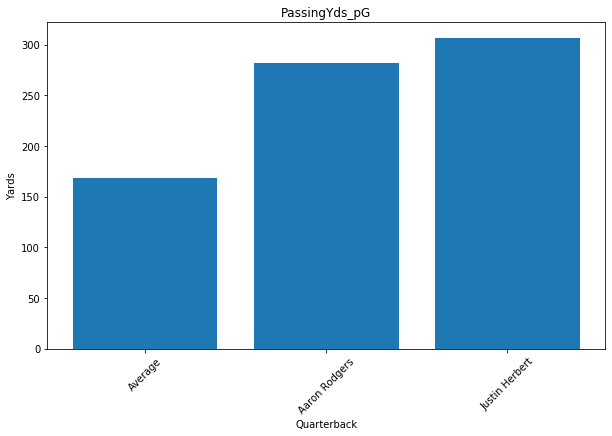

In [64]:
average, rodgers, aaron = print_metric(quarterbacks, 'PassingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassingYds_pG', 'Quarterback', 'Yards')

Avg PassesAttempted_pG: 23.42
Aaron Rodgers PassesAttempted_pG: 35.0
--------------------------------------------------
Avg PassesAttempted_pG: 23.42
Justin Herbert PassesAttempted_pG: 38.43
--------------------------------------------------


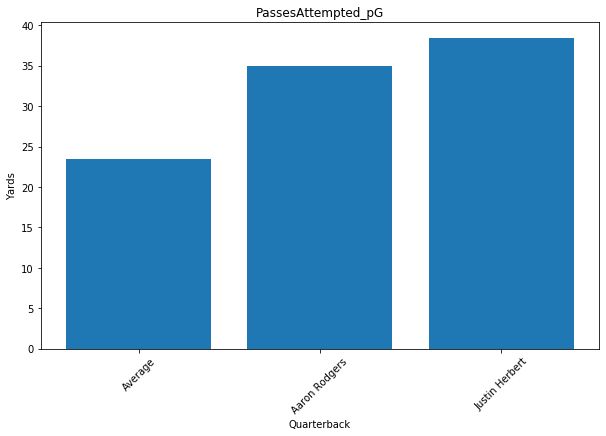

In [65]:
average, rodgers, aaron = print_metric(quarterbacks, 'PassesAttempted_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassesAttempted_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassesAttempted_pG', 'Quarterback', 'Yards')

Avg Completion_Percent: 0.64
Aaron Rodgers Completion_Percent: 0.68
--------------------------------------------------
Avg Completion_Percent: 0.64
Justin Herbert Completion_Percent: 0.67
--------------------------------------------------


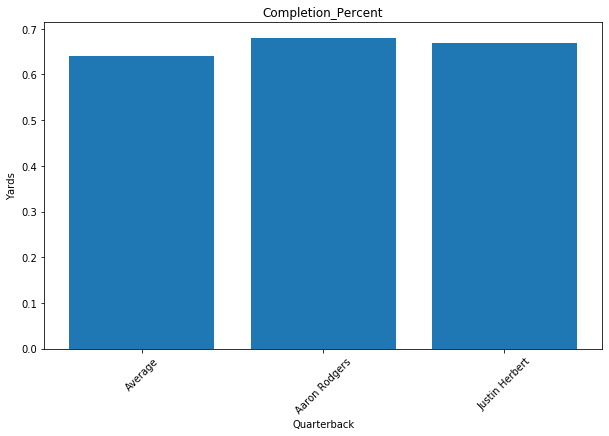

In [66]:
average, rodgers, aaron = print_metric(quarterbacks, 'Completion_Percent', qb1)
average, herbert, justin = print_metric(quarterbacks, 'Completion_Percent', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Completion_Percent', 'Quarterback', 'Yards')

Avg RushingYds_pG: 11.2
Aaron Rodgers RushingYds_pG: 7.62
--------------------------------------------------
Avg RushingYds_pG: 11.2
Justin Herbert RushingYds_pG: 23.71
--------------------------------------------------


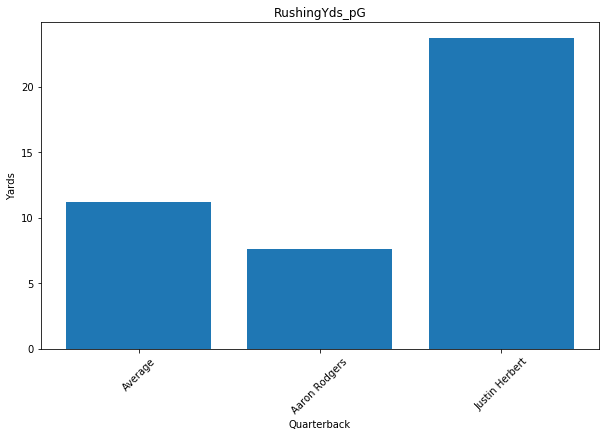

In [67]:
average, rodgers, aaron = print_metric(quarterbacks, 'RushingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'RushingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'RushingYds_pG', 'Quarterback', 'Yards')

In [68]:
available_qbs.columns

Index(['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted',
       'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs',
       'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingYdspAtt',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'YdspReception',
       'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'TwoPTConversions',
       'TwoPTConversionPasses', 'FDFantasyPts', 'PositionRank', 'OverallRank',
       'TTL', 'Week_1', 'Week_2', 'Week_3', 'Week_4', 'Week_5', 'Week_6',
       'Week_7', 'Week_8', 'Week_9', 'CompletedPasses_pG',
       'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG',
       'PassingTDs_pG', 'Yds_pAtt', 'Interceptions_pG', 'LostFumbles_pG',
       'RushingYds_pG', 'TTL_pG'],
      dtype='object')

Avg PassingTDs_pG: 1.06
Aaron Rodgers PassingTDs_pG: 3.0
--------------------------------------------------
Avg PassingTDs_pG: 1.06
Justin Herbert PassingTDs_pG: 2.43
--------------------------------------------------


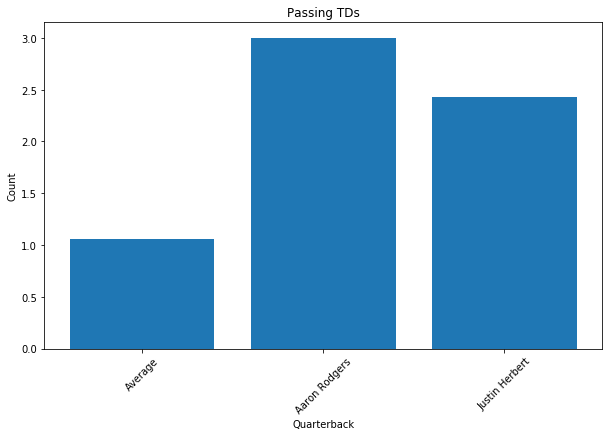

In [69]:
average, rodgers, aaron = print_metric(quarterbacks, 'PassingTDs_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingTDs_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Passing TDs', 'Quarterback', 'Count')

Week 7 match ups:
    
    Green Bay vs Jacksonville Jaguars
    Los Angeles Chargers vs Miami Dolphins
 

In [70]:
qb_opp = ['Jacksonville Jaguars', 'Miami Dolphins']

In [71]:
defense[defense['Team'].isin(qb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_Turnovers_pG,Sacks_pG,TTL_pG
3,Miami Dolphins,8,161,531,5.80,3074,215,1054,4.90,10,296,6.82,146,13.84,2020,11,25,17,65.80,14,7,7,20,77.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,20.12,384.25,26.88,131.75,37.00,18.25,0.49,252.50,1.38,1.75,2.50,9.62
28,Jacksonville Jaguars,8,247,523,6.40,3345,247,1105,4.47,11,268,8.36,170,13.18,2240,17,33,19,56.00,7,6,1,8,26.00,6.00,0.00,0.00,2.00,4.00,1.00,9.00,0.00,4.00,30.88,418.12,30.88,138.12,33.50,21.25,0.63,280.00,2.12,0.88,1.00,3.25


In [72]:
def1 = 28
def2 = 3

Avg RZ_Percent: 62.9
Jacksonville Jaguars RZ_Percent: 56.0
--------------------------------------------------
Avg RZ_Percent: 62.9
Miami Dolphins RZ_Percent: 65.8
--------------------------------------------------


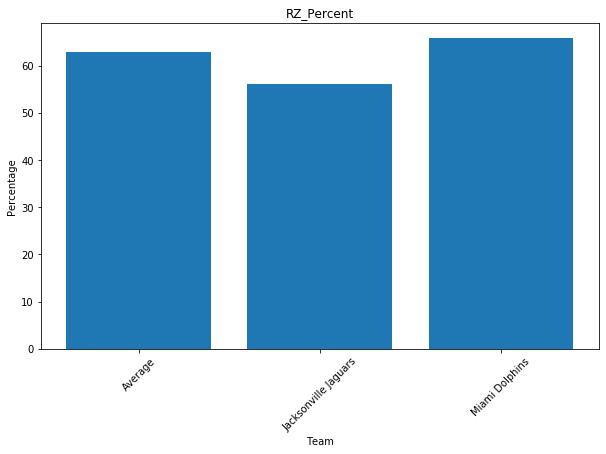

In [73]:
average, defteam1, team1 = print_metric_team(defense, 'RZ_Percent', def1)
average, defteam2, team2 = print_metric_team(defense, 'RZ_Percent', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'RZ_Percent', 'Team', 'Percentage')

Avg Passing_Yds_pG: 245.68
Jacksonville Jaguars Passing_Yds_pG: 280.0
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Miami Dolphins Passing_Yds_pG: 252.5
--------------------------------------------------


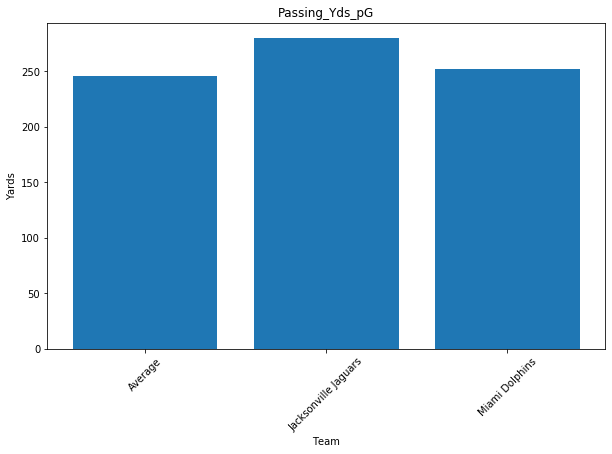

In [74]:
average, defteam1, team1 = print_metric_team(defense, 'Passing_Yds_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_Yds_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')

Avg Passing_TDs_pG: 1.78
Jacksonville Jaguars Passing_TDs_pG: 2.12
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Miami Dolphins Passing_TDs_pG: 1.38
--------------------------------------------------


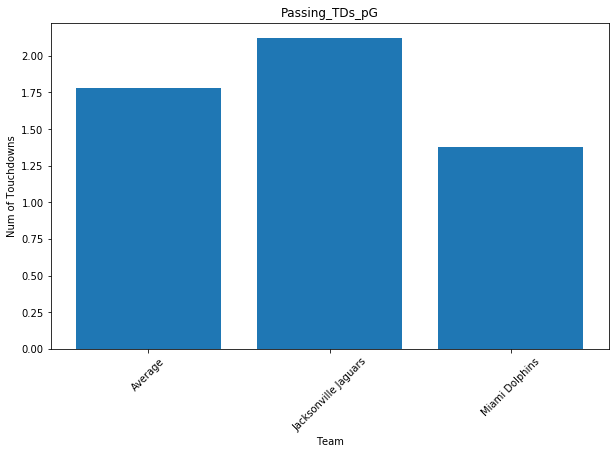

In [75]:
average, defteam1, team1 = print_metric_team(defense, 'Passing_TDs_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_TDs_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

Avg Ttl_Pts_Allowed_pG: 25.34
Jacksonville Jaguars Ttl_Pts_Allowed_pG: 30.88
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
Miami Dolphins Ttl_Pts_Allowed_pG: 20.12
--------------------------------------------------


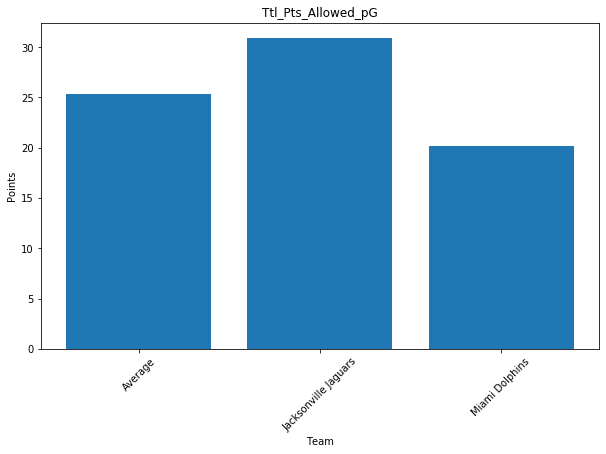

In [76]:
average, defteam1, team1 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')

Avg Ttl_Turnovers_pG: 1.28
Jacksonville Jaguars Ttl_Turnovers_pG: 0.88
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.28
Miami Dolphins Ttl_Turnovers_pG: 1.75
--------------------------------------------------


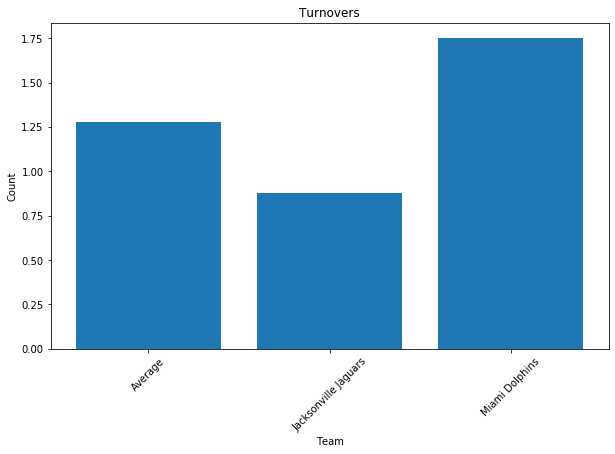

In [77]:
average, defteam1, team1 = print_metric_team(defense, 'Ttl_Turnovers_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Ttl_Turnovers_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Turnovers', 'Team', 'Count')

Rodgers looks to have the easier time this week facing Jacksonville. The Jaguars have allowed nearly 31 points, more than the average team and the Dolphins. The Dolphins also manage to create nearly 2 turnovers per game where the Jaguars generating less than 1 turnover per game. Rodgers capacity to protect the ball could very much work in my favor for this week.

## Runningbacks

In [78]:
runningbacks = offense[offense['Position'] == 'RB']

In [79]:
per_week_stats(runningbacks, 'RushingAttempts', 'Games')
per_week_stats(runningbacks, 'RushingYds', 'Games')
per_week_stats(runningbacks, 'Targeted', 'Games')
per_week_stats(runningbacks, 'Receptions', 'Games')
per_week_stats(runningbacks, 'RushingTDs', 'Games')
per_week_stats(runningbacks, 'ReceivingTDs', 'Games')
per_week_stats(runningbacks, 'LostFumbles', 'Games')

In [80]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
0,Dalvin Cook,MIN,RB,25,7,7,0,0,0,0,0,144,858,14.60,12,21,16,173,18.10,1,1,1,13,3,0,193.10,1,1,185.10,20.80,15.10,23.90,26.60,14.90,0.00,0.00,46.60,37.20,20.57,122.57,3.00,2.29,1.71,0.14,0.14
2,Alvin Kamara,NOR,RB,25,8,6,0,0,0,0,0,96,471,13.10,5,72,60,565,13.20,3,1,0,8,0,0,181.60,2,3,151.60,18.70,29.40,31.70,17.90,11.90,0.00,14.80,16.30,10.90,12.00,58.88,9.00,7.50,0.62,0.38,0.00
5,Derrick Henry,TEN,RB,26,8,8,0,0,0,0,0,182,843,10.30,8,18,10,81,9.00,0,0,0,8,0,0,145.40,3,6,140.40,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,6.80,22.75,105.38,2.25,1.25,1.00,0.00,0.00
10,James Robinson,JAX,RB,22,8,8,0,0,0,0,0,132,580,7.90,5,34,27,225,11.30,2,2,1,7,1,0,136.00,4,11,122.50,9.00,18.00,24.90,10.70,5.00,11.30,27.70,0.00,15.90,16.50,72.50,4.25,3.38,0.62,0.25,0.12
12,Todd Gurley,ATL,RB,26,9,9,0,0,0,0,0,159,584,9.70,9,22,15,79,7.70,0,2,0,9,0,0,127.80,5,13,120.30,11.70,6.10,14.20,18.30,21.00,6.70,20.20,10.60,11.50,17.67,64.89,2.44,1.67,1.00,0.00,0.00


In [81]:
runningbacks[runningbacks['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
5,Derrick Henry,TEN,RB,26,8,8,0,0,0,0,0,182,843,10.30,8,18,10,81,9.00,0,0,0,8,0,0,145.40,3,6,140.40,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,6.80,22.75,105.38,2.25,1.25,1.00,0.00,0.00
55,Chris Carson,SEA,RB,26,6,6,0,0,0,0,0,66,323,12.90,3,25,22,147,12.80,3,1,0,6,0,0,94.00,15,56,83.00,18.60,16.80,7.60,22.00,13.90,0.00,4.10,0.00,0.00,11.00,53.83,4.17,3.67,0.50,0.50,0.00
57,Darrell Henderson,LAR,RB,23,8,6,0,0,0,0,0,95,458,12.20,3,15,10,120,12.00,1,0,0,4,0,0,86.80,16,58,81.80,0.60,18.10,18.00,3.80,18.80,9.20,7.70,5.80,0.00,11.88,57.25,1.88,1.25,0.38,0.12,0.00
203,Justin Jackson,LAC,RB,25,6,4,0,0,0,0,0,45,185,5.10,0,19,15,131,15.30,0,0,0,0,0,0,39.10,59,,31.60,0.40,0.00,0.00,2.10,9.40,0.00,5.50,14.20,0.00,7.50,30.83,3.17,2.50,0.00,0.00,0.00


In [82]:
available_rbs = runningbacks[~runningbacks['Player'].isin(taken_wrt)]

In [83]:
scaled_rbs = available_rbs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'RushingAttempts_pG', 
                            'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 'ReceivingTDs_pG', 
                            'LostFumbles_pG']]

rb_columns = ['RushingAttempts_pG', 'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 
              'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_rbs, rb_columns)

scaled_rbs.head()

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
5,Derrick Henry,TEN,RB,8,8,4.32,4.36,0.67,0.17,5.12,-0.43,-0.31
55,Chris Carson,SEA,RB,6,6,1.56,1.78,2.14,2.39,2.26,4.79,-0.31
57,Darrell Henderson,LAR,RB,8,6,1.77,1.95,0.39,0.17,1.55,0.87,-0.31
64,Kenyan Drake,ARI,RB,7,5,2.97,2.74,0.05,-0.06,2.67,-0.43,-0.31
66,D'Andre Swift,DET,RB,8,0,0.57,0.65,2.20,2.01,2.26,0.87,-0.31


In [84]:
scaled_rbs['Combined_Score'] = (scaled_rbs['RushingAttempts_pG'] + scaled_rbs['RushingYds_pG'] + 
                                scaled_rbs['Targeted_pG'] + scaled_rbs['Receptions_pG'] + 
                                scaled_rbs['RushingTDs_pG'] + scaled_rbs['ReceivingTDs_pG'] - 
                                scaled_rbs['LostFumbles_pG'])

scaled_rbs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_rbs.head(10)

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
55,Chris Carson,SEA,RB,6,6,1.56,1.78,2.14,2.39,2.26,4.79,-0.31,15.23
5,Derrick Henry,TEN,RB,8,8,4.32,4.36,0.67,0.17,5.12,-0.43,-0.31,14.51
120,Raheem Mostert,SFO,RB,4,4,1.97,2.87,1.25,1.55,0.83,2.18,-0.31,10.96
155,Austin Ekeler,LAC,RB,4,4,1.86,2.19,2.20,2.93,0.83,-0.43,-0.31,9.89
66,D'Andre Swift,DET,RB,8,0,0.57,0.65,2.20,2.01,2.26,0.87,-0.31,8.87
64,Kenyan Drake,ARI,RB,7,5,2.97,2.74,0.05,-0.06,2.67,-0.43,-0.31,8.25
119,Nyheim Hines,IND,RB,8,0,-0.05,-0.25,2.30,2.24,0.12,3.48,-0.31,8.15
96,Myles Gaskin,MIA,RB,7,5,2.33,1.85,2.77,2.96,1.04,-0.43,2.96,7.57
57,Darrell Henderson,LAR,RB,8,6,1.77,1.95,0.39,0.17,1.55,0.87,-0.31,7.00
116,Giovani Bernard,CIN,RB,8,2,0.16,-0.02,1.72,1.78,0.83,2.18,-0.31,6.96


In [85]:
rb1 = 55
rb2 = 5
rb3 = 120
rb4 = 66
rb5 = 64
rb6 = 57

Avg RushingAttempts_pG: 4.33
Chris Carson RushingAttempts_pG: 11.0
--------------------------------------------------
Avg RushingAttempts_pG: 4.33
Derrick Henry RushingAttempts_pG: 22.75
--------------------------------------------------
Avg RushingAttempts_pG: 4.33
Raheem Mostert RushingAttempts_pG: 12.75
--------------------------------------------------
Avg RushingAttempts_pG: 4.33
D'Andre Swift RushingAttempts_pG: 6.75
--------------------------------------------------
Avg RushingAttempts_pG: 4.33
Kenyan Drake RushingAttempts_pG: 17.0
--------------------------------------------------
Avg RushingAttempts_pG: 4.33
Darrell Henderson RushingAttempts_pG: 11.88
--------------------------------------------------


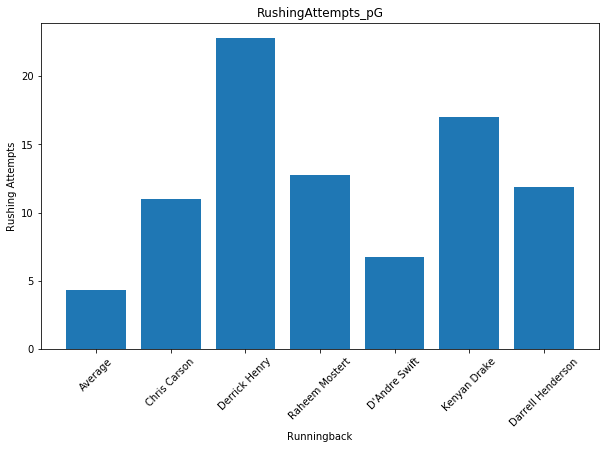

In [86]:
average, rb_1, _1rb = print_metric(available_rbs, 'RushingAttempts_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingAttempts_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingAttempts_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingAttempts_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingAttempts_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingAttempts_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingAttempts_pG', 'Runningback', 'Rushing Attempts')

Avg RushingYds_pG: 18.31
Chris Carson RushingYds_pG: 53.83
--------------------------------------------------
Avg RushingYds_pG: 18.31
Derrick Henry RushingYds_pG: 105.38
--------------------------------------------------
Avg RushingYds_pG: 18.31
Raheem Mostert RushingYds_pG: 75.75
--------------------------------------------------
Avg RushingYds_pG: 18.31
D'Andre Swift RushingYds_pG: 31.25
--------------------------------------------------
Avg RushingYds_pG: 18.31
Kenyan Drake RushingYds_pG: 73.14
--------------------------------------------------
Avg RushingYds_pG: 18.31
Darrell Henderson RushingYds_pG: 57.25
--------------------------------------------------


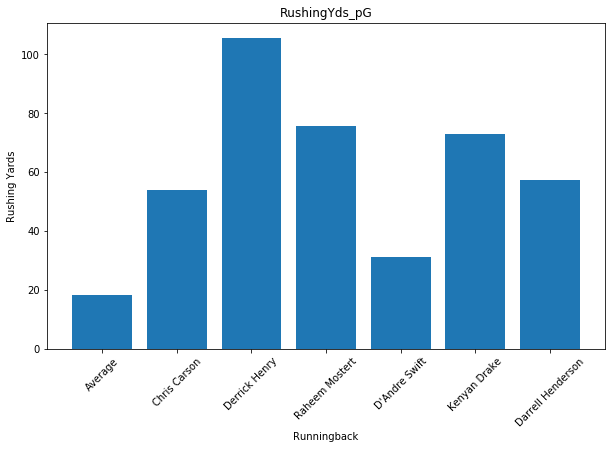

In [87]:
average, rb_1, _1rb = print_metric(available_rbs, 'RushingYds_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingYds_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingYds_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingYds_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingYds_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingYds_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingYds_pG', 'Runningback', 'Rushing Yards')

Avg RushingTDs_pG: 0.1
Chris Carson RushingTDs_pG: 0.5
--------------------------------------------------
Avg RushingTDs_pG: 0.1
Derrick Henry RushingTDs_pG: 1.0
--------------------------------------------------
Avg RushingTDs_pG: 0.1
Raheem Mostert RushingTDs_pG: 0.25
--------------------------------------------------
Avg RushingTDs_pG: 0.1
D'Andre Swift RushingTDs_pG: 0.5
--------------------------------------------------
Avg RushingTDs_pG: 0.1
Kenyan Drake RushingTDs_pG: 0.57
--------------------------------------------------
Avg RushingTDs_pG: 0.1
Darrell Henderson RushingTDs_pG: 0.38
--------------------------------------------------


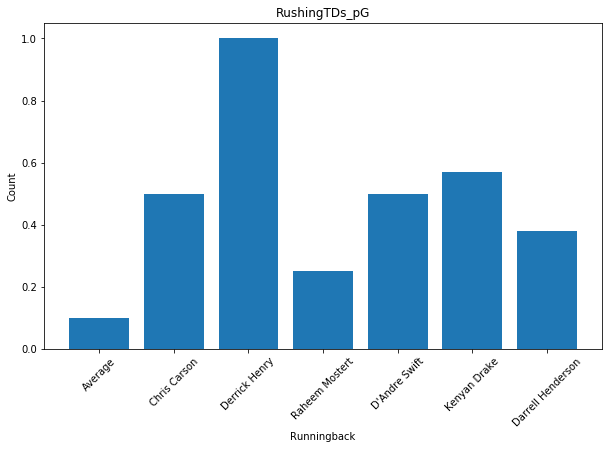

In [90]:
average, rb_1, _1rb = print_metric(available_rbs, 'RushingTDs_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingTDs_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingTDs_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingTDs_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingTDs_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingTDs_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingTDs_pG', 'Runningback', 'Count')

Avg Targeted_pG: 1.37
Chris Carson Targeted_pG: 4.17
--------------------------------------------------
Avg Targeted_pG: 1.37
Derrick Henry Targeted_pG: 2.25
--------------------------------------------------
Avg Targeted_pG: 1.37
Raheem Mostert Targeted_pG: 3.0
--------------------------------------------------
Avg Targeted_pG: 1.37
D'Andre Swift Targeted_pG: 4.25
--------------------------------------------------
Avg Targeted_pG: 1.37
Kenyan Drake Targeted_pG: 1.43
--------------------------------------------------
Avg Targeted_pG: 1.37
Darrell Henderson Targeted_pG: 1.88
--------------------------------------------------


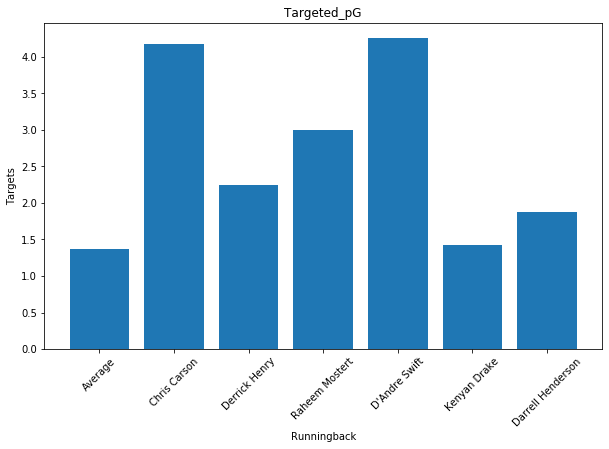

In [88]:
average, rb_1, _1rb = print_metric(available_rbs, 'Targeted_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'Targeted_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'Targeted_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'Targeted_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'Targeted_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'Targeted_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Targeted_pG', 'Runningback', 'Targets')

Avg Receptions_pG: 1.07
Chris Carson Receptions_pG: 3.67
--------------------------------------------------
Avg Receptions_pG: 1.07
Derrick Henry Receptions_pG: 1.25
--------------------------------------------------
Avg Receptions_pG: 1.07
Raheem Mostert Receptions_pG: 2.75
--------------------------------------------------
Avg Receptions_pG: 1.07
D'Andre Swift Receptions_pG: 3.25
--------------------------------------------------
Avg Receptions_pG: 1.07
Kenyan Drake Receptions_pG: 1.0
--------------------------------------------------
Avg Receptions_pG: 1.07
Darrell Henderson Receptions_pG: 1.25
--------------------------------------------------


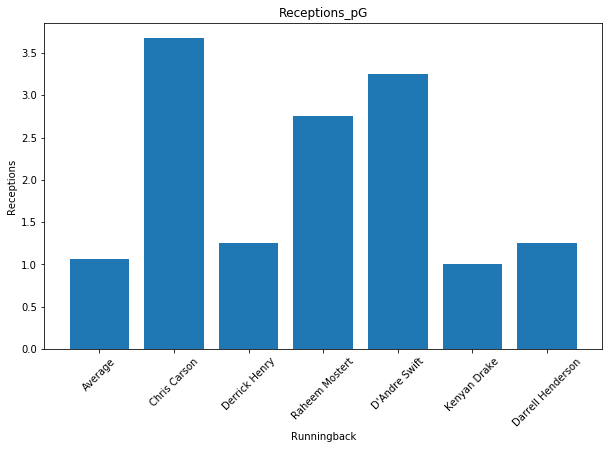

In [89]:
average, rb_1, _1rb = print_metric(available_rbs, 'Receptions_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'Receptions_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'Receptions_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'Receptions_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'Receptions_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'Receptions_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Receptions_pG', 'Runningback', 'Receptions')

Week 10 opponents:
    
    Seattle Seahawks vs Los Angeles Rams
    Tennessee Titans vs Indianapolis Colts
    San Francisco 49ers vs New Orleans Saints
    Detroit Lions vs Washington Football Team
    Arizona Cardinals vs Buffalo Bills
    Los Angeles Rams vs Seattle Seahawks

In [91]:
rb_opp = ['Los Angeles Rams', 'Indianapolis Colts', 'New Orleans Saints', 'Washington Football Team', 
          'Buffalo Bills', 'Seattle Seahawks']

In [92]:
defense[defense['Team'].isin(rb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_Turnovers_pG,Sacks_pG,TTL_pG
1,Los Angeles Rams,8,152,493,4.70,2335,192,758,3.95,6,276,5.71,169,9.33,1577,9,23,14,64.60,10,6,4,25,58.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,19.00,291.88,24.00,94.75,34.50,21.12,0.61,197.12,1.12,1.25,3.12,7.25
2,Indianapolis Colts,8,160,481,4.80,2320,202,669,3.31,6,259,6.37,125,13.21,1651,10,21,14,66.80,13,11,2,20,88.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00,5.00,20.00,290.00,25.25,83.62,32.38,15.62,0.48,206.38,1.25,1.62,2.50,11.00
7,Washington Football Team,8,188,498,5.00,2514,240,1029,4.29,9,231,6.43,127,11.69,1485,11,23,13,56.20,9,8,1,27,52.00,15.00,4.00,1.00,4.00,2.00,4.00,17.00,0.00,5.00,23.50,314.25,30.00,128.62,28.88,15.88,0.55,185.62,1.38,1.12,3.38,6.50
10,New Orleans Saints,8,200,483,5.20,2493,183,642,3.51,5,278,6.66,145,12.77,1851,19,25,20,73.10,9,7,2,22,47.00,15.00,4.00,-3.00,4.00,3.00,0.00,1.00,7.00,16.00,25.00,311.62,22.88,80.25,34.75,18.12,0.52,231.38,2.38,1.12,2.75,5.88
22,Buffalo Bills,9,233,570,5.80,3283,245,1132,4.62,13,301,7.15,165,13.04,2151,14,36,23,59.60,14,6,8,24,50.00,8.00,2.00,5.00,6.00,-4.00,3.00,14.00,4.00,12.00,25.89,364.78,27.22,125.78,33.44,18.33,0.55,239.00,1.56,1.56,2.67,5.56
27,Seattle Seahawks,8,243,589,6.20,3646,204,749,3.67,11,366,7.92,207,14.00,2897,16,33,22,70.00,14,9,5,19,40.00,6.00,3.00,9.00,5.00,7.00,0.00,0.00,7.00,3.00,30.38,455.75,25.50,93.62,45.75,25.88,0.57,362.12,2.00,1.75,2.38,5.00


In [93]:
teamRB1 = 1
teamRB2 = 2
teamRB3 = 10
teamRB4 = 7
teamRB5 = 22
teamRB6 = 27

Avg Rushing_Att_pG: 27.03
Los Angeles Rams Rushing_Att_pG: 24.0
--------------------------------------------------
Avg Rushing_Att_pG: 27.03
Indianapolis Colts Rushing_Att_pG: 25.25
--------------------------------------------------
Avg Rushing_Att_pG: 27.03
New Orleans Saints Rushing_Att_pG: 22.88
--------------------------------------------------
Avg Rushing_Att_pG: 27.03
Washington Football Team Rushing_Att_pG: 30.0
--------------------------------------------------
Avg Rushing_Att_pG: 27.03
Buffalo Bills Rushing_Att_pG: 27.22
--------------------------------------------------
Avg Rushing_Att_pG: 27.03
Seattle Seahawks Rushing_Att_pG: 25.5
--------------------------------------------------


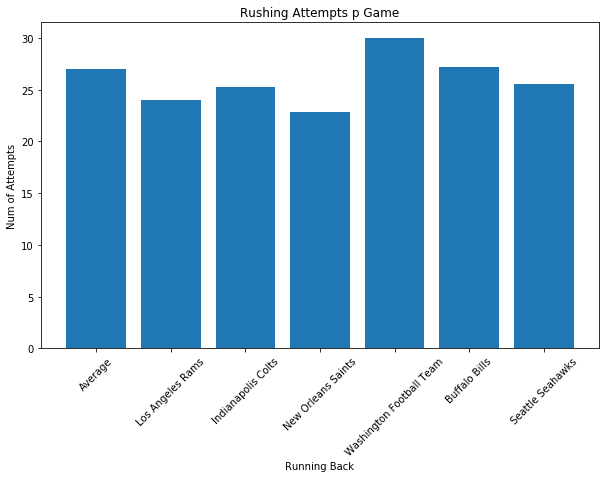

In [94]:
average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_Att_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_Att_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Att_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_Att_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_Att_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_Att_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Attempts p Game', 'Running Back', 'Num of Attempts')

Avg Rushing_Yds_pG: 117.79
Los Angeles Rams Rushing_Yds_pG: 94.75
--------------------------------------------------
Avg Rushing_Yds_pG: 117.79
Indianapolis Colts Rushing_Yds_pG: 83.62
--------------------------------------------------
Avg Rushing_Yds_pG: 117.79
New Orleans Saints Rushing_Yds_pG: 80.25
--------------------------------------------------
Avg Rushing_Yds_pG: 117.79
Washington Football Team Rushing_Yds_pG: 128.62
--------------------------------------------------
Avg Rushing_Yds_pG: 117.79
Buffalo Bills Rushing_Yds_pG: 125.78
--------------------------------------------------
Avg Rushing_Yds_pG: 117.79
Seattle Seahawks Rushing_Yds_pG: 93.62
--------------------------------------------------


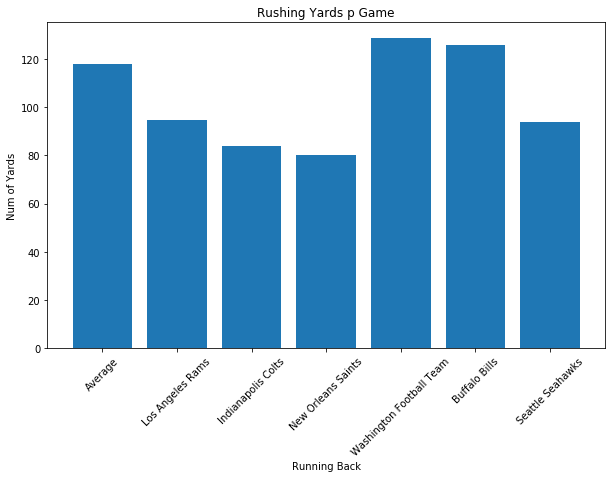

In [95]:
average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Yards p Game', 'Running Back', 'Num of Yards')

Avg Rushing_TDs: 8.53
Los Angeles Rams Rushing_TDs: 6
--------------------------------------------------
Avg Rushing_TDs: 8.53
Indianapolis Colts Rushing_TDs: 6
--------------------------------------------------
Avg Rushing_TDs: 8.53
New Orleans Saints Rushing_TDs: 5
--------------------------------------------------
Avg Rushing_TDs: 8.53
Washington Football Team Rushing_TDs: 9
--------------------------------------------------
Avg Rushing_TDs: 8.53
Buffalo Bills Rushing_TDs: 13
--------------------------------------------------
Avg Rushing_TDs: 8.53
Seattle Seahawks Rushing_TDs: 11
--------------------------------------------------


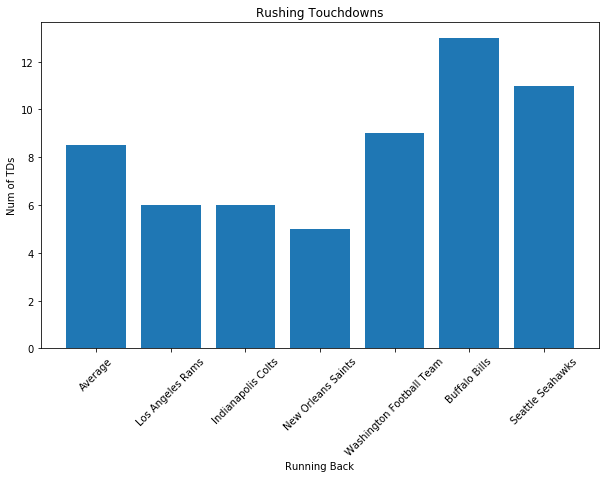

In [96]:
average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_TDs', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_TDs', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_TDs', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_TDs', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_TDs', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_TDs', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Touchdowns', 'Running Back', 'Num of TDs')


## Tight End

In [97]:
tight_ends = offense[offense['Position'] == 'TE']

In [98]:
per_week_stats(tight_ends, 'Targeted', 'Games')
per_week_stats(tight_ends, 'Receptions', 'Games')
per_week_stats(tight_ends, 'ReceivingYds', 'Games')
per_week_stats(tight_ends, 'ReceivingTDs', 'Games')
per_week_stats(tight_ends, 'LostFumbles', 'Games')

In [99]:
tight_ends.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
7,Travis Kelce,KAN,TE,31,9,9,0,0,0,0,0,0,0,0.00,0,80,58,769,15.60,6,1,1,6,0,0,139.90,1,8,110.90,11.00,15.00,8.70,7.00,16.80,16.50,3.10,16.90,15.90,8.89,6.44,85.44,0.67,0.11
32,T.J. Hockenson,DET,TE,23,8,8,0,0,0,0,0,0,0,0.00,0,49,34,360,15.90,5,0,0,5,1,0,85.00,2,33,68.00,11.60,6.20,5.30,8.90,0.00,7.70,11.90,6.50,9.90,6.12,4.25,45.00,0.62,0.00
34,Jonnu Smith,TEN,TE,25,8,8,0,0,0,0,0,0,0,0.00,0,37,24,304,18.70,6,0,0,6,0,0,78.40,3,35,66.40,9.60,20.40,6.10,0.00,16.00,1.30,0.90,2.90,9.20,4.62,3.00,38.00,0.75,0.00
45,Darren Waller,LVR,TE,28,8,7,0,0,0,0,0,0,0,0.00,0,71,50,394,15.80,4,1,1,4,0,0,86.40,4,46,61.40,4.50,16.30,0.90,6.80,10.80,0.00,11.00,2.80,8.20,8.88,6.25,49.25,0.50,0.12
46,Robert Tonyan,GNB,TE,26,8,7,0,0,0,0,0,0,0,0.00,0,28,24,314,13.80,5,0,0,5,0,0,73.40,5,47,61.40,0.00,8.50,11.00,27.80,0.00,2.50,3.20,7.90,0.50,3.50,3.00,39.25,0.62,0.00


In [100]:
tight_ends[tight_ends['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
34,Jonnu Smith,TEN,TE,25,8,8,0,0,0,0,0,0,0,0.00,0,37,24,304,18.70,6,0,0,6,0,0,78.40,3,35,66.40,9.60,20.40,6.10,0.00,16.00,1.30,0.90,2.90,9.20,4.62,3.00,38.00,0.75,0.00
69,Rob Gronkowski,TAM,TE,31,9,9,0,0,0,0,0,0,0,0.00,0,46,27,323,20.60,3,1,0,3,0,0,63.80,10,70,50.30,1.10,0.00,4.80,2.90,5.20,13.80,12.20,10.10,0.20,5.11,3.00,35.89,0.33,0.00


In [101]:
available_te = tight_ends[~tight_ends['Player'].isin(taken_wrt)]

In [102]:
scaled_te = available_te[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'Targeted_pG', 
                          'Receptions_pG', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

te_columns = ['Targeted_pG', 'Receptions_pG', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_te, te_columns)

scaled_te.head()

,Player,Team,Position,Age,Games,GamesStarted,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
34,Jonnu Smith,TEN,TE,25,8,8,1.58,1.50,1.95,3.60,-0.34
50,Jimmy Graham,CHI,TE,34,9,9,2.50,2.32,1.59,2.43,-0.34
69,Rob Gronkowski,TAM,TE,31,9,9,1.88,1.50,1.78,1.10,-0.34
147,Dalton Schultz,DAL,TE,24,9,7,2.50,2.32,2.33,0.43,2.07
154,Eric Ebron,PIT,TE,27,8,6,2.04,2.08,1.76,1.35,2.37


In [103]:
scaled_te['Combined_Score'] = (scaled_te['Targeted_pG'] + scaled_te['Receptions_pG'] + 
                               scaled_te['ReceivingYds_pG'] + scaled_te['ReceivingTDs_pG'] -
                               scaled_te['LostFumbles_pG'])

scaled_te.sort_values('Combined_Score', ascending = False, inplace = True)
scaled_te.head(10)

,Player,Team,Position,Age,Games,GamesStarted,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
302,C.J. Uzomah,CIN,TE,27,2,2,2.12,2.42,2.41,2.10,-0.34,9.39
50,Jimmy Graham,CHI,TE,34,9,9,2.50,2.32,1.59,2.43,-0.34,9.17
34,Jonnu Smith,TEN,TE,25,8,8,1.58,1.50,1.95,3.60,-0.34,8.97
224,O.J. Howard,TAM,TE,26,4,1,1.66,1.26,1.83,2.10,-0.34,7.19
172,Logan Thomas,WAS,TE,29,8,7,2.27,1.50,1.25,1.35,-0.34,6.70
69,Rob Gronkowski,TAM,TE,31,9,9,1.88,1.50,1.78,1.10,-0.34,6.59
260,Dallas Goedert,PHI,TE,25,4,2,1.66,1.96,1.98,0.60,-0.34,6.53
222,Austin Hooper,CLE,TE,26,6,6,2.12,2.12,1.64,0.10,-0.34,6.31
264,Jordan Reed,SFO,TE,30,4,0,1.51,1.50,0.63,2.10,-0.34,6.07
147,Dalton Schultz,DAL,TE,24,9,7,2.50,2.32,2.33,0.43,2.07,5.51


In [106]:
te1 = 50
te2 = 34
te3 = 172
te4 = 69

Avg Targeted_pG: 2.05
Jimmy Graham Targeted_pG: 6.11
--------------------------------------------------
Avg Targeted_pG: 2.05
Jonnu Smith Targeted_pG: 4.62
--------------------------------------------------
Avg Targeted_pG: 2.05
Logan Thomas Targeted_pG: 5.75
--------------------------------------------------
Avg Targeted_pG: 2.05
Rob Gronkowski Targeted_pG: 5.11
--------------------------------------------------


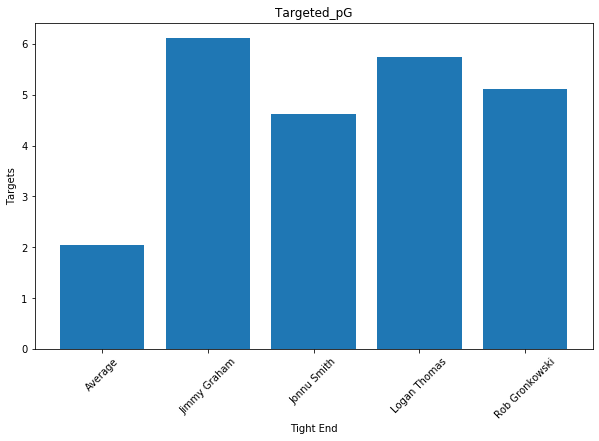

In [107]:
average, te_1, _1te = print_metric(available_te, 'Targeted_pG', te1)
average, te_2, _2te = print_metric(available_te, 'Targeted_pG', te2)
average, te_3, _3te = print_metric(available_te, 'Targeted_pG', te3)
average, te_4, _4te = print_metric(available_te, 'Targeted_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'Targeted_pG', 'Tight End', 'Targets')

Avg Receptions_pG: 1.39
Jimmy Graham Receptions_pG: 3.89
--------------------------------------------------
Avg Receptions_pG: 1.39
Jonnu Smith Receptions_pG: 3.0
--------------------------------------------------
Avg Receptions_pG: 1.39
Logan Thomas Receptions_pG: 3.0
--------------------------------------------------
Avg Receptions_pG: 1.39
Rob Gronkowski Receptions_pG: 3.0
--------------------------------------------------


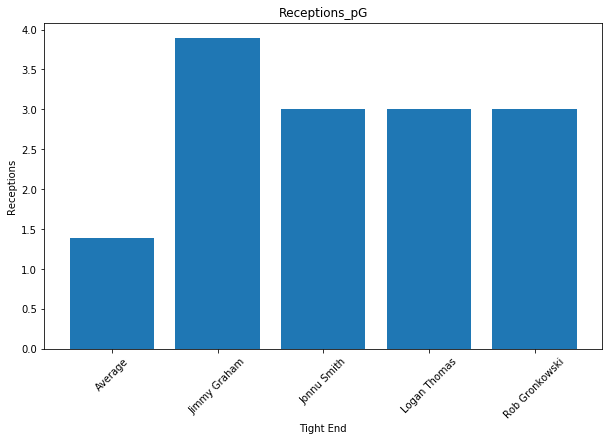

In [108]:
average, te_1, _1te = print_metric(available_te, 'Receptions_pG', te1)
average, te_2, _2te = print_metric(available_te, 'Receptions_pG', te2)
average, te_3, _3te = print_metric(available_te, 'Receptions_pG', te3)
average, te_4, _4te = print_metric(available_te, 'Receptions_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'Receptions_pG', 'Tight End', 'Receptions')

Avg ReceivingYds_pG: 14.41
Jimmy Graham ReceivingYds_pG: 33.56
--------------------------------------------------
Avg ReceivingYds_pG: 14.41
Jonnu Smith ReceivingYds_pG: 38.0
--------------------------------------------------
Avg ReceivingYds_pG: 14.41
Logan Thomas ReceivingYds_pG: 29.5
--------------------------------------------------
Avg ReceivingYds_pG: 14.41
Rob Gronkowski ReceivingYds_pG: 35.89
--------------------------------------------------


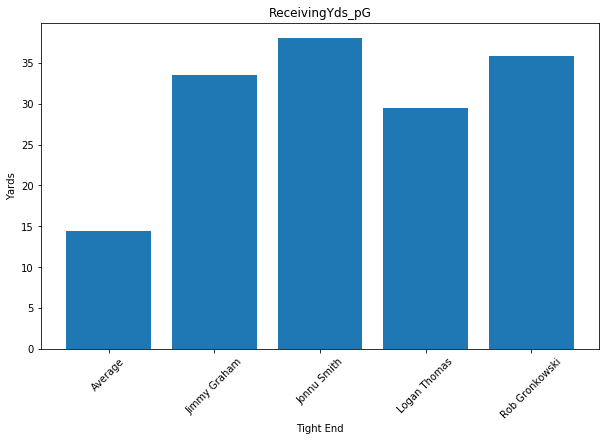

In [109]:
average, te_1, _1te = print_metric(available_te, 'ReceivingYds_pG', te1)
average, te_2, _2te = print_metric(available_te, 'ReceivingYds_pG', te2)
average, te_3, _3te = print_metric(available_te, 'ReceivingYds_pG', te3)
average, te_4, _4te = print_metric(available_te, 'ReceivingYds_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'ReceivingYds_pG', 'Tight End', 'Yards')

Avg ReceivingTDs_pG: 0.15
Jimmy Graham ReceivingTDs_pG: 0.56
--------------------------------------------------
Avg ReceivingTDs_pG: 0.15
Jonnu Smith ReceivingTDs_pG: 0.75
--------------------------------------------------
Avg ReceivingTDs_pG: 0.15
Logan Thomas ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.15
Rob Gronkowski ReceivingTDs_pG: 0.33
--------------------------------------------------


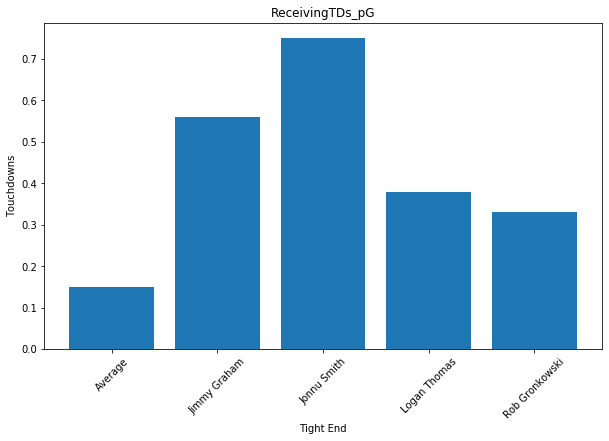

In [110]:
average, te_1, _1te = print_metric(available_te, 'ReceivingTDs_pG', te1)
average, te_2, _2te = print_metric(available_te, 'ReceivingTDs_pG', te2)
average, te_3, _3te = print_metric(available_te, 'ReceivingTDs_pG', te3)
average, te_4, _4te = print_metric(available_te, 'ReceivingTDs_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'ReceivingTDs_pG', 'Tight End', 'Touchdowns')

In [111]:
te_opp = ['Minnesota Vikings', 'Indianapolis Colts', 'Detroit Lions', 'Carolina Panthers']

In [112]:
defense[defense['Team'].isin(te_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_Turnovers_pG,Sacks_pG,TTL_pG
2,Indianapolis Colts,8,160,481,4.80,2320,202,669,3.31,6,259,6.37,125,13.21,1651,10,21,14,66.80,13,11,2,20,88.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00,5.00,20.00,290.00,25.25,83.62,32.38,15.62,0.48,206.38,1.25,1.62,2.50,11.00
20,Carolina Panthers,9,226,567,5.70,3256,225,1029,4.57,12,333,6.69,183,12.17,2227,13,33,20,60.20,12,5,7,9,32.00,-1.00,3.00,11.00,3.00,5.00,2.00,3.00,4.00,2.00,25.11,361.78,25.00,114.33,37.00,20.33,0.55,247.44,1.44,1.33,1.00,3.56
23,Minnesota Vikings,8,234,549,6.00,3303,236,1000,4.24,5,297,7.75,157,14.67,2303,19,31,17,57.10,9,6,3,16,25.00,-4.00,3.00,2.00,5.00,6.00,0.00,0.00,3.00,9.00,29.25,412.88,29.50,125.00,37.12,19.62,0.53,287.88,2.38,1.12,2.00,3.12
25,Detroit Lions,8,240,524,6.00,3136,247,1185,4.80,13,266,7.33,140,13.94,1951,17,32,23,75.00,7,5,2,11,13.00,1.00,-3.00,7.00,0.00,0.00,6.00,4.00,-2.00,0.00,30.00,392.00,30.88,148.12,33.25,17.50,0.53,243.88,2.12,0.88,1.38,1.62


In [115]:
teamTE1 = 23
teamTE2 = 2
teamTE3 = 25
teamTE4 = 20

Avg Passing_Att_pG: 35.35
Minnesota Vikings Passing_Att_pG: 37.12
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Indianapolis Colts Passing_Att_pG: 32.38
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Detroit Lions Passing_Att_pG: 33.25
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Carolina Panthers Passing_Att_pG: 37.0
--------------------------------------------------


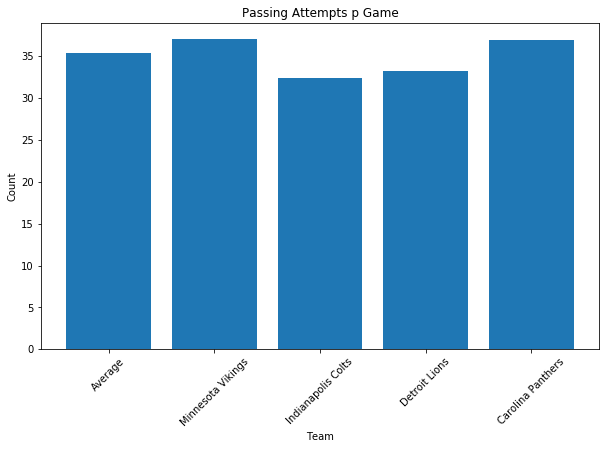

In [116]:
average, te_team1, te_def1 = print_metric_team(defense, 'Passing_Att_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_Att_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_Att_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_Att_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing Attempts p Game', 'Team', 'Count')

Avg Completions_pG: 19.26
Minnesota Vikings Completions_pG: 19.62
--------------------------------------------------
Avg Completions_pG: 19.26
Indianapolis Colts Completions_pG: 15.62
--------------------------------------------------
Avg Completions_pG: 19.26
Detroit Lions Completions_pG: 17.5
--------------------------------------------------
Avg Completions_pG: 19.26
Carolina Panthers Completions_pG: 20.33
--------------------------------------------------


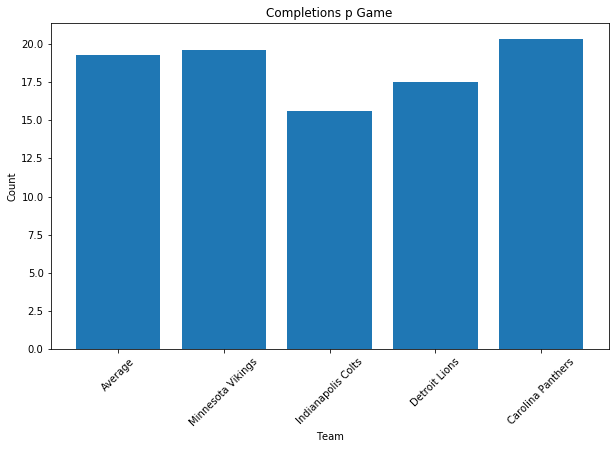

In [117]:
average, te_team1, te_def1 = print_metric_team(defense, 'Completions_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Completions_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Completions_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Completions_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Completions p Game', 'Team', 'Count')

Avg Passing_Yds_pG: 245.68
Minnesota Vikings Passing_Yds_pG: 287.88
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Indianapolis Colts Passing_Yds_pG: 206.38
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Detroit Lions Passing_Yds_pG: 243.88
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Carolina Panthers Passing_Yds_pG: 247.44
--------------------------------------------------


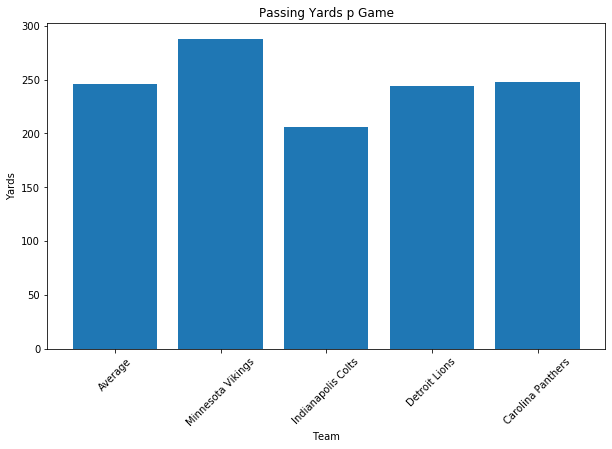

In [120]:
average, te_team1, te_def1 = print_metric_team(defense, 'Passing_Yds_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_Yds_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_Yds_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_Yds_pG', teamTE4)


x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing Yards p Game', 'Team', 'Yards')

Avg Passing_TDs_pG: 1.78
Minnesota Vikings Passing_TDs_pG: 2.38
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Indianapolis Colts Passing_TDs_pG: 1.25
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Detroit Lions Passing_TDs_pG: 2.12
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Carolina Panthers Passing_TDs_pG: 1.44
--------------------------------------------------


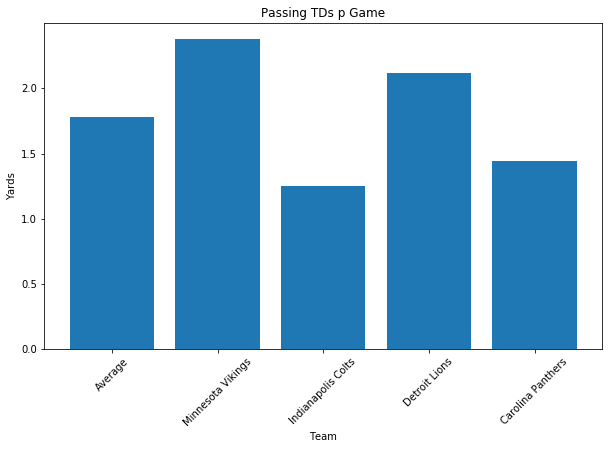

In [121]:
average, te_team1, te_def1 = print_metric_team(defense, 'Passing_TDs_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_TDs_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_TDs_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_TDs_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing TDs p Game', 'Team', 'Yards')

I don't even know what to do this week. The Carolina Panthers are not giving up in terms of passing yards and touchdowns. The Colts are also not giving muchb in terms of touchdowns so Smith is facing an uphill battle. Maybe I go with Graham? Maybe Thomas? I'm still not sure.

## Wide Receiver

In [122]:
wrs = offense[offense['Position'] == 'WR']

In [123]:
per_week_stats(wrs, 'Targeted', 'Games')
per_week_stats(wrs, 'Receptions', 'Games')
wrs['Catch_Rate'] = wrs['Receptions_pG']/wrs['Targeted_pG']
per_week_stats(wrs, 'ReceivingYds', 'Games')
per_week_stats(wrs, 'ReceivingTDs', 'Games')
per_week_stats(wrs, 'LostFumbles', 'Games')

In [124]:
wrs[wrs['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
24,DeAndre Hopkins,ARI,WR,28,8,8,0,0,0,0,0,0,0,0.00,0,76,60,734,14.30,3,1,1,3,0,0,119.40,9,25,89.40,15.10,12.80,13.70,4.10,19.10,7.30,14.30,0.00,3.00,9.50,7.50,0.79,91.75,0.38,0.12
38,Julio Jones,ATL,WR,31,7,7,0,0,0,0,0,0,0,0.00,0,56,43,638,22.40,3,0,0,3,0,0,103.30,18,39,81.80,15.70,2.40,0.00,3.20,0.00,25.70,9.70,13.70,11.40,8.00,6.14,0.77,91.14,0.43,0.00
42,Robby Anderson,CAR,WR,27,9,9,0,0,0,0,0,1,3,3.00,0,80,60,751,17.20,1,1,1,1,1,0,111.40,20,43,81.50,19.50,8.90,5.50,9.90,11.50,7.70,7.40,4.80,6.30,8.89,6.67,0.75,83.44,0.11,0.11
43,Tyler Boyd,CIN,WR,26,8,5,1,1,16,0,0,4,38,14.00,0,68,54,584,18.10,3,1,0,3,0,0,107.80,21,44,80.80,3.30,13.20,12.50,9.40,4.20,7.90,16.70,13.60,0.00,8.50,6.75,0.79,73.00,0.38,0.00
103,Cole Beasley,BUF,WR,31,9,5,0,0,0,0,0,0,0,0.00,0,54,44,533,13.10,2,0,0,2,0,0,87.30,33,,65.30,5.80,7.00,10.00,9.20,5.30,10.50,11.20,2.40,3.90,6.00,4.89,0.81,59.22,0.22,0.00


In [125]:
available_wrs = wrs[~wrs['Player'].isin(taken_wrt)]
available_wrs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
24,DeAndre Hopkins,ARI,WR,28,8,8,0,0,0,0,0,0,0,0.00,0,76,60,734,14.30,3,1,1,3,0,0,119.40,9,25,89.40,15.10,12.80,13.70,4.10,19.10,7.30,14.30,0.00,3.00,9.50,7.50,0.79,91.75,0.38,0.12
38,Julio Jones,ATL,WR,31,7,7,0,0,0,0,0,0,0,0.00,0,56,43,638,22.40,3,0,0,3,0,0,103.30,18,39,81.80,15.70,2.40,0.00,3.20,0.00,25.70,9.70,13.70,11.40,8.00,6.14,0.77,91.14,0.43,0.00
42,Robby Anderson,CAR,WR,27,9,9,0,0,0,0,0,1,3,3.00,0,80,60,751,17.20,1,1,1,1,1,0,111.40,20,43,81.50,19.50,8.90,5.50,9.90,11.50,7.70,7.40,4.80,6.30,8.89,6.67,0.75,83.44,0.11,0.11
43,Tyler Boyd,CIN,WR,26,8,5,1,1,16,0,0,4,38,14.00,0,68,54,584,18.10,3,1,0,3,0,0,107.80,21,44,80.80,3.30,13.20,12.50,9.40,4.20,7.90,16.70,13.60,0.00,8.50,6.75,0.79,73.00,0.38,0.00
51,CeeDee Lamb,DAL,WR,21,9,7,0,0,0,0,0,5,33,12.00,0,68,44,595,18.20,3,2,1,3,0,0,100.80,23,52,78.80,5.90,11.50,6.60,20.20,12.40,6.40,0.10,4.60,11.10,7.56,4.89,0.65,66.11,0.33,0.11


In [126]:
available_wrs.columns

Index(['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted',
       'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs',
       'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingYdspAtt',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'YdspReception',
       'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'TwoPTConversions',
       'TwoPTConversionPasses', 'FDFantasyPts', 'PositionRank', 'OverallRank',
       'TTL', 'Week_1', 'Week_2', 'Week_3', 'Week_4', 'Week_5', 'Week_6',
       'Week_7', 'Week_8', 'Week_9', 'Targeted_pG', 'Receptions_pG',
       'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG'],
      dtype='object')

In [127]:
scaled_wrs = available_wrs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'Targeted_pG', 'Receptions_pG', 
                            'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

wr_columns = ['Targeted_pG', 'Receptions_pG', 'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_wrs, wr_columns)

scaled_wrs.head()

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
24,DeAndre Hopkins,ARI,WR,8,8,2.67,3.37,0.66,3.06,1.34,1.09
38,Julio Jones,ATL,WR,7,7,2.03,2.52,0.54,3.03,1.65,-0.23
42,Robby Anderson,CAR,WR,9,9,2.41,2.84,0.44,2.67,-0.16,0.94
43,Tyler Boyd,CIN,WR,8,5,2.24,2.90,0.68,2.18,1.34,-0.23
51,CeeDee Lamb,DAL,WR,9,7,1.84,1.73,-0.11,1.85,1.11,0.94


In [128]:
scaled_wrs['Combined_Score'] = (scaled_wrs['Targeted_pG'] + scaled_wrs['Receptions_pG'] + 
                                scaled_wrs['Catch_Rate'] + scaled_wrs['ReceivingYds_pG'] + 
                                scaled_wrs['ReceivingTDs_pG'] - scaled_wrs['LostFumbles_pG'])

scaled_wrs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_wrs.head(10)

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
114,Jamison Crowder,NYJ,WR,5,4,2.71,2.55,-0.12,2.59,2.63,-0.23,10.59
24,DeAndre Hopkins,ARI,WR,8,8,2.67,3.37,0.66,3.06,1.34,1.09,10.01
38,Julio Jones,ATL,WR,7,7,2.03,2.52,0.54,3.03,1.65,-0.23,10.00
43,Tyler Boyd,CIN,WR,8,5,2.24,2.90,0.68,2.18,1.34,-0.23,9.57
180,Allen Lazard,GNB,WR,3,3,1.03,1.38,0.52,2.73,3.01,-0.23,8.90
136,Emmanuel Sanders,NOR,WR,6,2,1.53,1.80,0.34,1.42,2.06,-0.23,7.39
125,Corey Davis,TEN,WR,6,6,1.60,1.70,0.12,1.64,2.06,-0.23,7.34
42,Robby Anderson,CAR,WR,9,9,2.41,2.84,0.44,2.67,-0.16,0.94,7.26
56,Christian Kirk,ARI,WR,7,6,1.05,0.73,-0.51,1.43,4.09,-0.23,7.03
70,Brandin Cooks,HOU,WR,8,8,1.81,1.57,-0.28,1.74,1.34,-0.23,6.42


In [129]:
wr1 = 24
wr2 = 43
wr3 = 180
wr4 = 136
wr5 = 125
wr6 = 42
wr7 = 56
wr8 = 70

Avg Targeted_pG: 3.26
DeAndre Hopkins Targeted_pG: 9.5
--------------------------------------------------
Avg Targeted_pG: 3.26
Tyler Boyd Targeted_pG: 8.5
--------------------------------------------------
Avg Targeted_pG: 3.26
Allen Lazard Targeted_pG: 5.67
--------------------------------------------------
Avg Targeted_pG: 3.26
Emmanuel Sanders Targeted_pG: 6.83
--------------------------------------------------
Avg Targeted_pG: 3.26
Corey Davis Targeted_pG: 7.0
--------------------------------------------------
Avg Targeted_pG: 3.26
Robby Anderson Targeted_pG: 8.89
--------------------------------------------------
Avg Targeted_pG: 3.26
Christian Kirk Targeted_pG: 5.71
--------------------------------------------------
Avg Targeted_pG: 3.26
Brandin Cooks Targeted_pG: 7.5
--------------------------------------------------


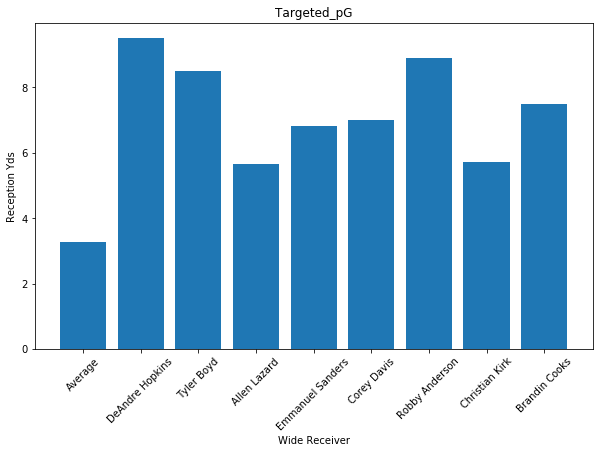

In [130]:
average, wr_1, _1wr = print_metric(available_wrs, 'Targeted_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Targeted_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Targeted_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Targeted_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Targeted_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Targeted_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Targeted_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Targeted_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Targeted_pG', 'Wide Receiver', 'Reception Yds')

Avg Receptions_pG: 2.13
DeAndre Hopkins Receptions_pG: 7.5
--------------------------------------------------
Avg Receptions_pG: 2.13
Tyler Boyd Receptions_pG: 6.75
--------------------------------------------------
Avg Receptions_pG: 2.13
Allen Lazard Receptions_pG: 4.33
--------------------------------------------------
Avg Receptions_pG: 2.13
Emmanuel Sanders Receptions_pG: 5.0
--------------------------------------------------
Avg Receptions_pG: 2.13
Corey Davis Receptions_pG: 4.83
--------------------------------------------------
Avg Receptions_pG: 2.13
Robby Anderson Receptions_pG: 6.67
--------------------------------------------------
Avg Receptions_pG: 2.13
Christian Kirk Receptions_pG: 3.29
--------------------------------------------------
Avg Receptions_pG: 2.13
Brandin Cooks Receptions_pG: 4.62
--------------------------------------------------


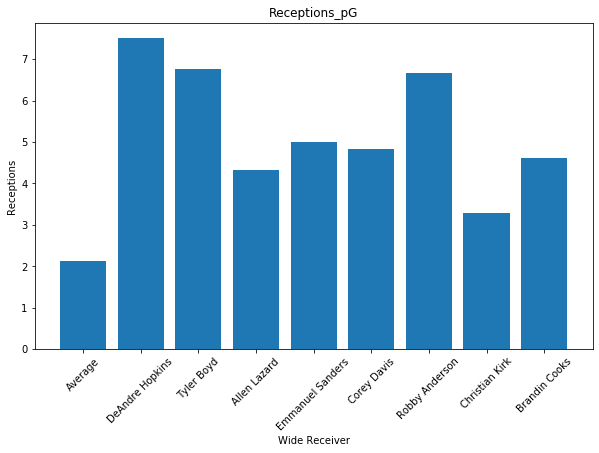

In [131]:
average, wr_1, _1wr = print_metric(available_wrs, 'Receptions_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Receptions_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Receptions_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Receptions_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Receptions_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Receptions_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Receptions_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Receptions_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Receptions_pG', 'Wide Receiver', 'Receptions')

Avg Catch_Rate: 0.67
DeAndre Hopkins Catch_Rate: 0.79
--------------------------------------------------
Avg Catch_Rate: 0.67
Tyler Boyd Catch_Rate: 0.79
--------------------------------------------------
Avg Catch_Rate: 0.67
Allen Lazard Catch_Rate: 0.76
--------------------------------------------------
Avg Catch_Rate: 0.67
Emmanuel Sanders Catch_Rate: 0.73
--------------------------------------------------
Avg Catch_Rate: 0.67
Corey Davis Catch_Rate: 0.69
--------------------------------------------------
Avg Catch_Rate: 0.67
Robby Anderson Catch_Rate: 0.75
--------------------------------------------------
Avg Catch_Rate: 0.67
Christian Kirk Catch_Rate: 0.57
--------------------------------------------------
Avg Catch_Rate: 0.67
Brandin Cooks Catch_Rate: 0.62
--------------------------------------------------


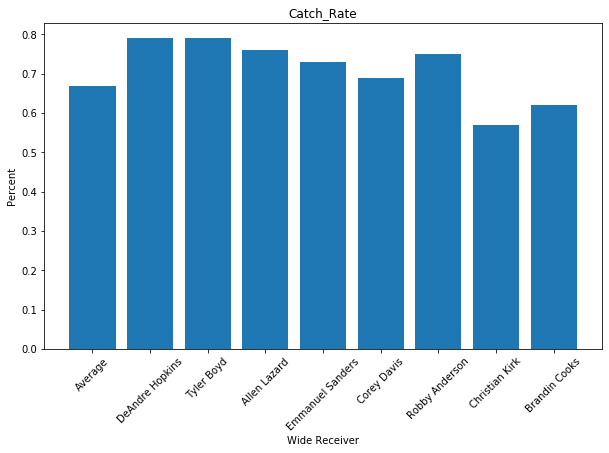

In [132]:
average, wr_1, _1wr = print_metric(available_wrs, 'Catch_Rate', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Catch_Rate', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Catch_Rate', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Catch_Rate', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Catch_Rate', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Catch_Rate', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Catch_Rate', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Catch_Rate', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Catch_Rate', 'Wide Receiver', 'Percent')

Avg ReceivingYds_pG: 26.75
DeAndre Hopkins ReceivingYds_pG: 91.75
--------------------------------------------------
Avg ReceivingYds_pG: 26.75
Tyler Boyd ReceivingYds_pG: 73.0
--------------------------------------------------
Avg ReceivingYds_pG: 26.75
Allen Lazard ReceivingYds_pG: 84.67
--------------------------------------------------
Avg ReceivingYds_pG: 26.75
Emmanuel Sanders ReceivingYds_pG: 57.0
--------------------------------------------------
Avg ReceivingYds_pG: 26.75
Corey Davis ReceivingYds_pG: 61.5
--------------------------------------------------
Avg ReceivingYds_pG: 26.75
Robby Anderson ReceivingYds_pG: 83.44
--------------------------------------------------
Avg ReceivingYds_pG: 26.75
Christian Kirk ReceivingYds_pG: 57.14
--------------------------------------------------
Avg ReceivingYds_pG: 26.75
Brandin Cooks ReceivingYds_pG: 63.75
--------------------------------------------------


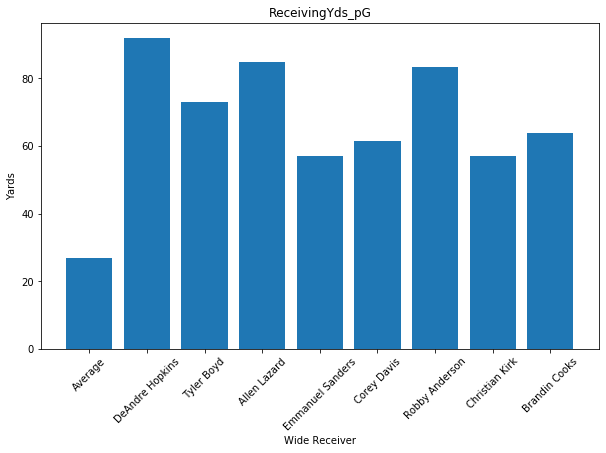

In [133]:
average, wr_1, _1wr = print_metric(available_wrs, 'ReceivingYds_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'ReceivingYds_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'ReceivingYds_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'ReceivingYds_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'ReceivingYds_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'ReceivingYds_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'ReceivingYds_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'ReceivingYds_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'ReceivingYds_pG', 'Wide Receiver', 'Yards')

Avg ReceivingTDs_pG: 0.14
DeAndre Hopkins ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Tyler Boyd ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Allen Lazard ReceivingTDs_pG: 0.67
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Emmanuel Sanders ReceivingTDs_pG: 0.5
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Corey Davis ReceivingTDs_pG: 0.5
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Robby Anderson ReceivingTDs_pG: 0.11
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Christian Kirk ReceivingTDs_pG: 0.86
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Brandin Cooks ReceivingTDs_pG: 0.38
--------------------------------------------------


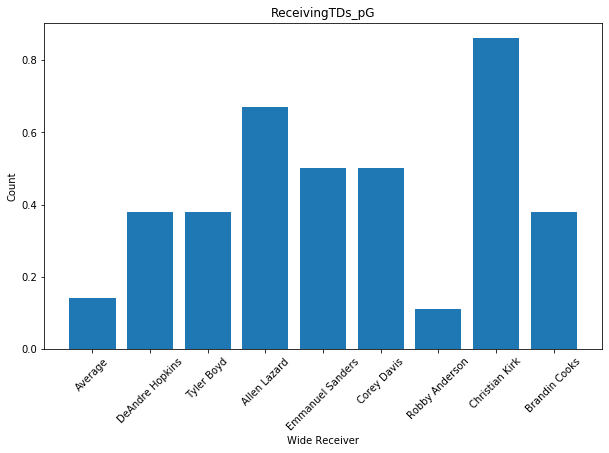

In [134]:
average, wr_1, _1wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'ReceivingTDs_pG', 'Wide Receiver', 'Count')

In [135]:
wr_opp = ['Buffalo Bills', 'Pittsburgh Steelers', 'Jacksonville Jaguars', 'San Francisco 49ers', 'Indianapolis Colts', 
          'Tampa Bay Buccaneers', 'Buffalo Bills', 'Cleveland Browns']

In [136]:
defense[defense['Team'].isin(list(wr_opp))]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_Turnovers_pG,Sacks_pG,TTL_pG
2,Indianapolis Colts,8,160,481,4.80,2320,202,669,3.31,6,259,6.37,125,13.21,1651,10,21,14,66.80,13,11,2,20,88.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00,5.00,20.00,290.00,25.25,83.62,32.38,15.62,0.48,206.38,1.25,1.62,2.50,11.00
4,Pittsburgh Steelers,8,161,500,5.10,2539,200,822,4.11,5,268,6.41,122,14.07,1717,14,22,13,64.80,15,11,4,32,81.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,20.12,317.38,25.00,102.75,33.50,15.25,0.46,214.62,1.75,1.88,4.00,10.12
12,Tampa Bay Buccaneers,9,203,571,4.90,2816,215,701,3.26,7,327,6.47,179,11.82,2115,15,30,19,68.10,16,11,5,29,75.00,0.00,14.00,16.00,6.00,6.00,19.00,6.00,7.00,1.00,22.56,312.89,23.89,77.89,36.33,19.89,0.55,235.00,1.67,1.78,3.22,8.33
15,San Francisco 49ers,9,207,547,5.30,2922,241,956,3.97,5,291,6.76,151,13.02,1966,16,22,13,44.40,10,8,2,15,43.00,4.00,5.00,12.00,6.00,-2.00,3.00,17.00,-2.00,0.00,23.00,324.67,26.78,106.22,32.33,16.78,0.52,218.44,1.78,1.11,1.67,4.78
22,Buffalo Bills,9,233,570,5.80,3283,245,1132,4.62,13,301,7.15,165,13.04,2151,14,36,23,59.60,14,6,8,24,50.00,8.00,2.00,5.00,6.00,-4.00,3.00,14.00,4.00,12.00,25.89,364.78,27.22,125.78,33.44,18.33,0.55,239.00,1.56,1.56,2.67,5.56
24,Cleveland Browns,8,237,545,5.50,2971,215,853,3.97,9,310,6.83,194,10.92,2118,17,35,21,60.20,14,7,7,20,47.00,0.00,4.00,14.00,5.00,13.00,1.00,7.00,3.00,0.00,29.62,371.38,26.88,106.62,38.75,24.25,0.63,264.75,2.12,1.75,2.50,5.88
28,Jacksonville Jaguars,8,247,523,6.40,3345,247,1105,4.47,11,268,8.36,170,13.18,2240,17,33,19,56.00,7,6,1,8,26.00,6.00,0.00,0.00,2.00,4.00,1.00,9.00,0.00,4.00,30.88,418.12,30.88,138.12,33.50,21.25,0.63,280.00,2.12,0.88,1.00,3.25


In [137]:
teamWR1 = 22
teamWR2 = 4
teamWR3 = 28
teamWR4 = 15
teamWR5 = 2
teamWR6 = 12
teamWR7 = 22
teamWR8 = 24

Avg Ttl_Pts_Allowed_pG: 25.34
Buffalo Bills Ttl_Pts_Allowed_pG: 25.89
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
Pittsburgh Steelers Ttl_Pts_Allowed_pG: 20.12
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
Jacksonville Jaguars Ttl_Pts_Allowed_pG: 30.88
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
San Francisco 49ers Ttl_Pts_Allowed_pG: 23.0
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
Indianapolis Colts Ttl_Pts_Allowed_pG: 20.0
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
Tampa Bay Buccaneers Ttl_Pts_Allowed_pG: 22.56
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
Buffalo Bills Ttl_Pts_Allowed_pG: 25.89
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 25.34
Cleveland Browns Ttl_Pts_Allowed_pG: 29.62
--------------------------------------------------


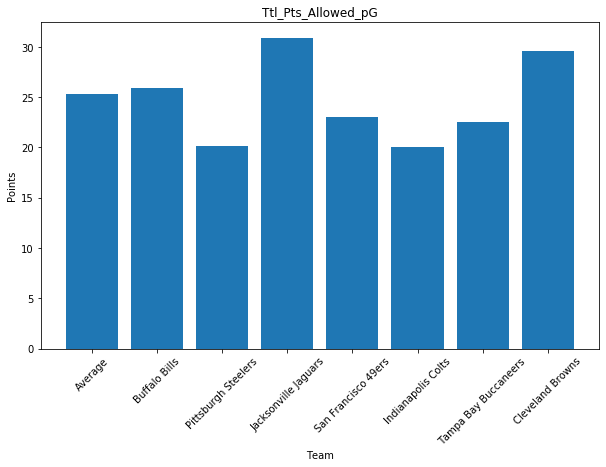

In [138]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')

Avg Passing_TDs_pG: 1.78
Buffalo Bills Passing_TDs_pG: 1.56
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Pittsburgh Steelers Passing_TDs_pG: 1.75
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Jacksonville Jaguars Passing_TDs_pG: 2.12
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
San Francisco 49ers Passing_TDs_pG: 1.78
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Indianapolis Colts Passing_TDs_pG: 1.25
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Tampa Bay Buccaneers Passing_TDs_pG: 1.67
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Buffalo Bills Passing_TDs_pG: 1.56
--------------------------------------------------
Avg Passing_TDs_pG: 1.78
Cleveland Browns Passing_TDs_pG: 2.12
--------------------------------------------------


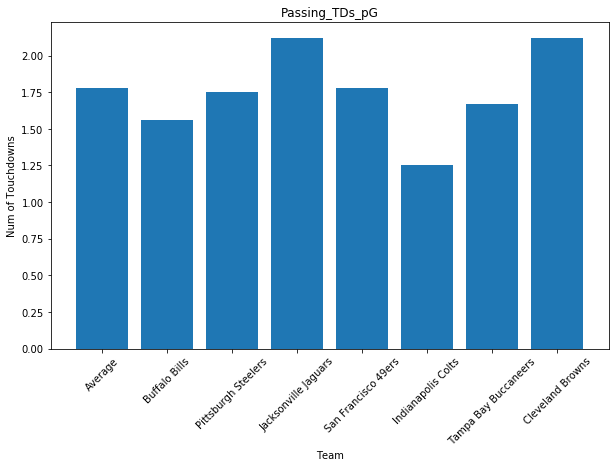

In [139]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_TDs_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_TDs_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_TDs_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_TDs_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_TDs_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_TDs_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_TDs_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_TDs_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

Avg Passing_Att_pG: 35.35
Buffalo Bills Passing_Att_pG: 33.44
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Pittsburgh Steelers Passing_Att_pG: 33.5
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Jacksonville Jaguars Passing_Att_pG: 33.5
--------------------------------------------------
Avg Passing_Att_pG: 35.35
San Francisco 49ers Passing_Att_pG: 32.33
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Indianapolis Colts Passing_Att_pG: 32.38
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Tampa Bay Buccaneers Passing_Att_pG: 36.33
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Buffalo Bills Passing_Att_pG: 33.44
--------------------------------------------------
Avg Passing_Att_pG: 35.35
Cleveland Browns Passing_Att_pG: 38.75
--------------------------------------------------


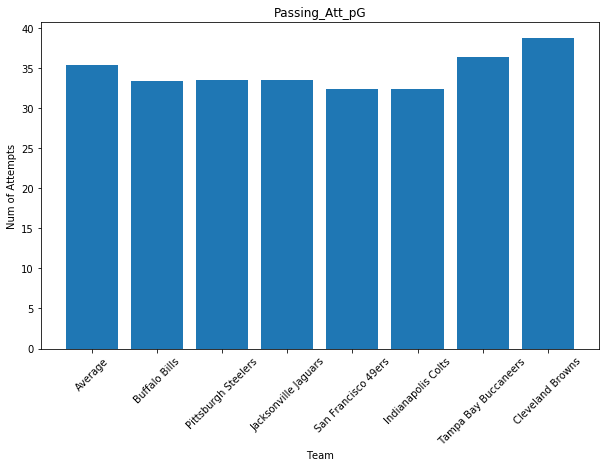

In [140]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_Att_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_Att_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_Att_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_Att_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_Att_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_Att_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_Att_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_Att_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_Att_pG', 'Team', 'Num of Attempts')

Avg Completions_pG: 19.26
Buffalo Bills Completions_pG: 18.33
--------------------------------------------------
Avg Completions_pG: 19.26
Pittsburgh Steelers Completions_pG: 15.25
--------------------------------------------------
Avg Completions_pG: 19.26
Jacksonville Jaguars Completions_pG: 21.25
--------------------------------------------------
Avg Completions_pG: 19.26
San Francisco 49ers Completions_pG: 16.78
--------------------------------------------------
Avg Completions_pG: 19.26
Indianapolis Colts Completions_pG: 15.62
--------------------------------------------------
Avg Completions_pG: 19.26
Tampa Bay Buccaneers Completions_pG: 19.89
--------------------------------------------------
Avg Completions_pG: 19.26
Buffalo Bills Completions_pG: 18.33
--------------------------------------------------
Avg Completions_pG: 19.26
Cleveland Browns Completions_pG: 24.25
--------------------------------------------------


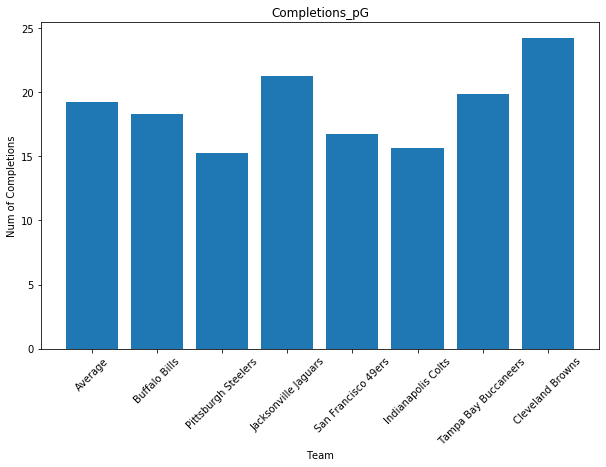

In [141]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Completions_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Completions_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Completions_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Completions_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Completions_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Completions_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Completions_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Completions_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Completions_pG', 'Team', 'Num of Completions')

Avg Completion_Percent_Allowed: 0.54
Buffalo Bills Completion_Percent_Allowed: 0.55
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.54
Pittsburgh Steelers Completion_Percent_Allowed: 0.46
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.54
Jacksonville Jaguars Completion_Percent_Allowed: 0.63
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.54
San Francisco 49ers Completion_Percent_Allowed: 0.52
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.54
Indianapolis Colts Completion_Percent_Allowed: 0.48
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.54
Tampa Bay Buccaneers Completion_Percent_Allowed: 0.55
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.54
Buffalo Bills Completion_Percent_Allowed: 0.55
--------------------------------------------------
Avg Completion_Percent_A

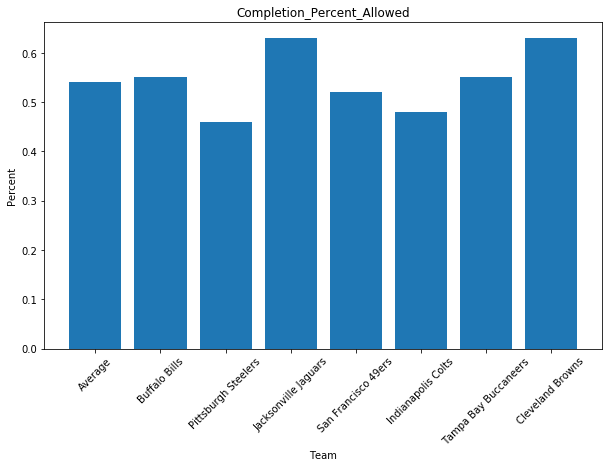

In [142]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Completion_Percent_Allowed', 'Team', 'Percent')

Avg Passing_Yds_pG: 245.68
Buffalo Bills Passing_Yds_pG: 239.0
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Pittsburgh Steelers Passing_Yds_pG: 214.62
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Jacksonville Jaguars Passing_Yds_pG: 280.0
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
San Francisco 49ers Passing_Yds_pG: 218.44
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Indianapolis Colts Passing_Yds_pG: 206.38
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Tampa Bay Buccaneers Passing_Yds_pG: 235.0
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Buffalo Bills Passing_Yds_pG: 239.0
--------------------------------------------------
Avg Passing_Yds_pG: 245.68
Cleveland Browns Passing_Yds_pG: 264.75
--------------------------------------------------


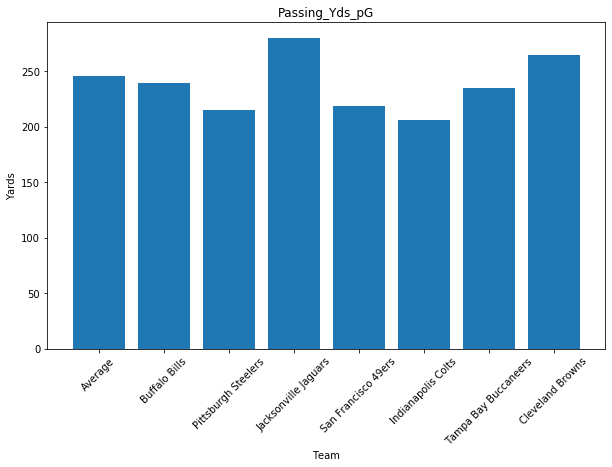

In [143]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_Yds_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_Yds_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_Yds_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_Yds_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_Yds_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_Yds_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_Yds_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_Yds_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')




## Defense

In [144]:
ttl_offense = offense[['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs', 'Interceptions', 
              'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 
              'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts']]

ttl_offense = ttl_offense.groupby('Team').sum()

In [145]:
ttl_offense.head()

,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts
Team,,,,,,,,,,,,,,,,
2TM,0,0,0,0,0,59,267,1,23,19,153,0,1,0,1,57.50
ARI,190,279,2130,16,7,253,1303,13,262,190,2130,16,10,3,29,748.50
ATL,236,352,2746,15,5,259,959,11,342,236,2746,15,6,2,26,809.30
BAL,135,215,1522,12,5,265,1361,10,207,136,1537,12,11,5,23,590.70
BUF,220,320,2609,19,5,229,903,9,310,220,2609,19,7,6,28,792.60


In [146]:
ttl_offense.reset_index(inplace=True)

In [147]:
team_names = pd.read_pickle('long_names')
ttl_offense = pd.merge(ttl_offense, team_names, on = 'Team')

In [148]:
ttl_offense.columns

Index(['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds',
       'PassingTDs', 'Interceptions', 'RushingAttempts', 'RushingYds',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'ReceivingTDs',
       'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts', 'Long_Name'],
      dtype='object')

In [149]:
num_games = defense[['Team', 'GP']]
num_games

,Team,GP
0,Baltimore Ravens,8
1,Los Angeles Rams,8
2,Indianapolis Colts,8
3,Miami Dolphins,8
4,Pittsburgh Steelers,8
5,Arizona Cardinals,8
6,Kansas City Chiefs,9
7,Washington Football Team,8
8,Chicago Bears,9
9,New England Patriots,8


In [150]:
ttl_offense = pd.merge(ttl_offense, num_games, left_on = 'Long_Name', right_on = 'Team')
ttl_offense.drop(columns=['Team_y'], inplace = True)
ttl_offense.rename(columns = {'Team_x': 'Team'}, inplace = True)
ttl_offense = ttl_offense[['Team', 'Long_Name', 'GP', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 
                           'PassingTDs', 'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 
                           'Receptions', 'ReceivingYds', 'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 
                           'FDFantasyPts']]

ttl_offense['Ttl_Turnovers'] = ttl_offense['Interceptions'] + ttl_offense['LostFumbles']
ttl_offense

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers
0,ARI,Arizona Cardinals,8,190,279,2130,16,7,253,1303,13,262,190,2130,16,10,3,29,748.50,10
1,ATL,Atlanta Falcons,9,236,352,2746,15,5,259,959,11,342,236,2746,15,6,2,26,809.30,7
2,BAL,Baltimore Ravens,8,135,215,1522,12,5,265,1361,10,207,136,1537,12,11,5,23,590.70,10
3,BUF,Buffalo Bills,9,220,320,2609,19,5,229,903,9,310,220,2609,19,7,6,28,792.60,11
4,CAR,Carolina Panthers,9,221,310,2419,11,6,222,958,11,295,222,2447,11,5,3,22,716.20,9
5,CHI,Chicago Bears,9,238,371,2306,16,10,199,730,2,358,237,2302,16,8,2,18,673.90,12
6,CIN,Cincinnati Bengals,8,222,331,2288,11,5,217,810,9,321,222,2288,11,11,5,20,661.30,10
7,CLE,Cleveland Browns,8,145,236,1634,16,7,237,1202,8,221,145,1634,16,5,2,24,620.40,9
8,DAL,Dallas Cowboys,9,248,389,2781,12,8,243,987,9,379,248,2781,12,17,12,21,762.00,20
9,DEN,Denver Broncos,8,170,295,1967,11,12,205,893,7,281,170,1967,11,12,4,18,585.70,16


In [151]:
per_week_stats(ttl_offense, 'CompletedPasses', 'GP')
per_week_stats(ttl_offense, 'PassesAttempted', 'GP')
ttl_offense['Completion_Percent'] = ttl_offense['CompletedPasses_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'PassingYds', 'GP')
ttl_offense['PassYds_pAtt'] = ttl_offense['PassingYds_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'RushingAttempts', 'GP')
per_week_stats(ttl_offense, 'RushingYds', 'GP')
ttl_offense['RushYds_pAtt'] = ttl_offense['RushingYds_pG']/ttl_offense['RushingAttempts_pG']
ttl_offense['Ttl_Yds'] = ttl_offense['PassingYds_pG'] + ttl_offense['RushingYds_pG']
per_week_stats(ttl_offense, 'Ttl_Turnovers', 'GP')
per_week_stats(ttl_offense, 'TtlTDs', 'GP')

In [152]:
taken_def = ['Baltimore Ravens', 'Buffalo Bills', 'Indianapolis Colts', 'Kansas City Chiefs',  'Los Angeles Rams',
             'New Orleans Saints', 'New York Giants', 'Pittsburgh Steelers', 'San Francisco 49ers', 
             'Tampa Bay Buccaneers']

In [153]:
taken_off = ['New England Patriots', 'Arizona Cardinals', 'Tennessee Titans', 'Seattle Seahawks', 
             'San Francisco 49ers', 'Philadelphia Eagles', 'Cincinnati Bengals', 
             'New Orleans Saints', 'Carolina Panthers']

In [181]:
available_def = defense[~defense['Team'].isin(taken_def)]

In [182]:
available_def

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Sacks_pG,TTL_pG,Ttl_Turnovers_pG
0,Miami Dolphins,7,130,467,5.60,2632,178,876,4.90,9,270,6.10,165,11.60,1756,8,22,15,68.20,13,7,6,19,63.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,18.57,376.00,25.43,125.14,38.57,23.57,0.61,250.86,1.14,2.71,9.00,1.86
4,Arizona Cardinals,7,146,485,5.50,2649,195,918,4.70,4,271,6.00,171,11.00,1731,12,27,12,44.40,10,6,4,19,47.00,4.00,9.00,4.00,1.00,7.00,15.00,7.00,0.00,20.86,378.43,27.86,131.14,38.71,24.43,0.63,247.29,1.71,2.71,6.71,1.43
8,Washington Football Team,7,165,424,5.10,2164,205,863,4.20,8,197,5.90,125,11.60,1301,10,21,11,52.40,9,8,1,22,47.00,15.00,4.00,1.00,4.00,2.00,4.00,17.00,0.00,23.57,309.14,29.29,123.29,28.14,17.86,0.63,185.86,1.43,3.14,6.71,1.29
9,Chicago Bears,8,166,533,5.20,2788,223,960,4.30,6,293,5.90,179,10.80,1828,8,30,12,40.00,9,5,4,17,48.00,3.00,12.00,4.00,2.00,6.00,11.00,9.00,1.00,20.75,348.50,27.88,120.00,36.62,22.38,0.61,228.50,1.00,2.12,6.00,1.12
10,New England Patriots,7,167,412,6.10,2501,216,983,4.60,8,186,7.70,125,12.80,1518,9,23,14,60.90,13,9,4,10,50.00,11.00,6.00,15.00,4.00,0.00,7.00,4.00,3.00,23.86,357.29,30.86,140.43,26.57,17.86,0.67,216.86,1.29,1.43,7.14,1.86
12,Denver Broncos,7,183,472,5.30,2520,190,864,4.50,5,262,5.90,173,10.30,1656,11,25,12,48.00,8,5,3,20,35.00,2.00,5.00,1.00,6.00,0.00,14.00,2.00,5.00,26.14,360.00,27.14,123.43,37.43,24.71,0.66,236.57,1.57,2.86,5.00,1.14
13,Tennessee Titans,7,184,474,5.90,2778,192,897,4.70,7,275,6.70,183,10.60,1881,17,26,21,80.80,12,9,3,7,26.00,3.00,5.00,7.00,10.00,8.00,-2.00,6.00,-1.00,26.29,396.86,27.43,128.14,39.29,26.14,0.67,268.71,2.43,1.00,3.71,1.71
14,Los Angeles Chargers,7,185,454,5.60,2548,166,786,4.70,5,273,6.10,175,10.50,1762,14,22,12,54.50,6,4,2,15,32.00,11.00,1.00,2.00,4.00,3.00,0.00,8.00,3.00,26.43,364.00,23.71,112.29,39.00,25.00,0.64,251.71,2.00,2.14,4.57,0.86
15,Green Bay Packers,7,187,409,5.90,2426,179,833,4.70,10,214,6.90,153,11.20,1593,12,23,17,73.90,4,2,2,16,30.00,5.00,12.00,3.00,5.00,0.00,-1.00,6.00,0.00,26.71,346.57,25.57,119.00,30.57,21.86,0.71,227.57,1.71,2.29,4.29,0.57
16,Carolina Panthers,8,193,509,5.60,2859,213,999,4.70,12,288,6.30,199,9.60,1860,9,29,17,58.60,11,5,6,8,30.00,-1.00,3.00,11.00,3.00,5.00,2.00,3.00,4.00,24.12,357.38,26.62,124.88,36.00,24.88,0.69,232.50,1.12,1.00,3.75,1.38


In [183]:
scaled_def = available_def[['Team', 'GP', 'Ttl_Pts_Allowed_pG', 'Ttl_Yds_pG', 'Rushing_Att_pG', 'Rushing_Yds_pG', 
                            'Completions', 'Completion_Percent_Allowed', 'Passing_Yds_pG', 'Passing_TDs', 'Sacks_pG',
                            'Ttl_Turnovers_pG']]

def_columns = ['Ttl_Pts_Allowed_pG', 'Ttl_Yds_pG', 'Rushing_Att_pG', 'Rushing_Yds_pG', 'Completions', 
               'Completion_Percent_Allowed', 'Passing_Yds_pG', 'Passing_TDs', 'Sacks_pG', 'Ttl_Turnovers_pG']

scale_data(scaled_def, def_columns)

scaled_def.head()

,Team,GP,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Completions,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs,Sacks_pG,Ttl_Turnovers_pG
0,Miami Dolphins,7,-2.25,-0.14,-1.00,-0.12,-0.37,-1.49,-0.07,-1.60,1.03,1.56
4,Arizona Cardinals,7,-1.63,-0.06,-0.06,0.23,-0.12,-0.91,-0.17,-0.45,1.03,0.54
8,Washington Football Team,7,-0.89,-2.19,0.50,-0.22,-1.99,-0.81,-1.85,-1.02,1.62,0.20
9,Chicago Bears,8,-1.66,-0.98,-0.05,-0.41,0.20,-1.50,-0.68,-1.60,0.22,-0.18
10,New England Patriots,7,-0.81,-0.71,1.11,0.77,-1.99,0.29,-1.00,-1.31,-0.73,1.56


In [184]:
scaled_def['Combined_Score'] = (scaled_def['Sacks_pG'] + scaled_def['Ttl_Turnovers_pG'] - 
                                scaled_def['Ttl_Pts_Allowed_pG'] - scaled_def['Ttl_Yds_pG'] -
                                scaled_def['Rushing_Att_pG'] - scaled_def['Rushing_Yds_pG'] - 
                                scaled_def['Completions'] - scaled_def['Completion_Percent_Allowed'] - 
                                scaled_def['Passing_Yds_pG'] - scaled_def['Passing_TDs'])

scaled_def.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_def.head()

,Team,GP,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Completions,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs,Sacks_pG,Ttl_Turnovers_pG,Combined_Score
8,Washington Football Team,7,-0.89,-2.19,0.50,-0.22,-1.99,-0.81,-1.85,-1.02,1.62,0.20,10.29
0,Miami Dolphins,7,-2.25,-0.14,-1.00,-0.12,-0.37,-1.49,-0.07,-1.60,1.03,1.56,9.63
9,Chicago Bears,8,-1.66,-0.98,-0.05,-0.41,0.20,-1.50,-0.68,-1.60,0.22,-0.18,6.72
4,Arizona Cardinals,7,-1.63,-0.06,-0.06,0.23,-0.12,-0.91,-0.17,-0.45,1.03,0.54,4.74
10,New England Patriots,7,-0.81,-0.71,1.11,0.77,-1.99,0.29,-1.00,-1.31,-0.73,1.56,4.49


In [185]:
available_off = ttl_offense[~ttl_offense['Long_Name'].isin(taken_off)]
available_off.head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,Ttl_Turnovers_pG,TtlTDs_pG
0,ARI,Arizona Cardinals,7,169,253,1847,13,7,216,1125,12,236,169,1847,13,8,2,25,646.60,9,24.14,36.14,0.67,263.86,7.30,30.86,160.71,5.21,424.57,1.29,3.57
1,ATL,Atlanta Falcons,8,211,317,2462,12,4,227,867,10,307,211,2462,12,6,2,22,712.90,6,26.38,39.62,0.67,307.75,7.77,28.38,108.38,3.82,416.12,0.75,2.75
3,BUF,Buffalo Bills,8,189,282,2194,16,5,210,869,7,272,189,2194,16,7,6,23,673.60,11,23.62,35.25,0.67,274.25,7.78,26.25,108.62,4.14,382.88,1.38,2.88
5,CHI,Chicago Bears,8,202,319,1971,14,10,180,685,2,311,201,1967,14,6,0,16,588.50,10,25.25,39.88,0.63,246.38,6.18,22.50,85.62,3.81,332.00,1.25,2.00
6,CIN,Cincinnati Bengals,8,222,331,2288,11,5,217,810,9,321,222,2288,11,11,5,20,661.30,10,27.75,41.38,0.67,286.00,6.91,27.12,101.25,3.73,387.25,1.25,2.50


In [186]:
def_team1 = 8 # Washington Football Team
def_team2 = 0 # Miami Dolphins
def_team3 = 9 # Chicago Bears
def_team4 = 4 # Arizona Cardinals
def_team5 = 10 # New England Patriots

In [187]:
off_opp = ['NYG', 'ARI', 'TEN', 'MIA', 'NYJ']

In [188]:
ttl_offense[ttl_offense['Team'].isin(off_opp)]

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,Ttl_Turnovers_pG,TtlTDs_pG
0,ARI,Arizona Cardinals,7,169,253,1847,13,7,216,1125,12,236,169,1847,13,8,2,25,646.60,9,24.14,36.14,0.67,263.86,7.30,30.86,160.71,5.21,424.57,1.29,3.57
19,MIA,Miami Dolphins,7,152,221,1637,11,7,189,685,7,219,152,1637,11,6,2,19,530.70,9,21.71,31.57,0.69,233.86,7.41,27.00,97.86,3.62,331.71,1.29,2.71
23,NYG,New York Giants,8,169,273,1684,7,9,177,788,5,258,169,1684,7,9,6,12,480.00,15,21.12,34.12,0.62,210.50,6.17,22.12,98.50,4.45,309.00,1.88,1.50
24,NYJ,New York Jets,8,153,270,1442,4,7,169,694,3,248,149,1397,4,4,2,7,388.30,9,19.12,33.75,0.57,180.25,5.34,21.12,86.75,4.11,267.00,1.12,0.88
30,TEN,Tennessee Titans,7,157,233,1823,17,3,215,1089,9,225,157,1823,17,3,1,26,665.60,4,22.43,33.29,0.67,260.43,7.82,30.71,155.57,5.07,416.00,0.57,3.71


In [189]:
off_team1 = 23
off_team2 = 0
off_team3 = 30
off_team4 = 19
off_team5 = 24

Avg Ttl_Yds_pG: 380.53
Washington Football Team Ttl_Yds_pG: 309.14
--------------------------------------------------
Avg Ttl_Yds_pG: 380.53
Miami Dolphins Ttl_Yds_pG: 376.0
--------------------------------------------------
Avg Ttl_Yds_pG: 380.53
Chicago Bears Ttl_Yds_pG: 348.5
--------------------------------------------------
Avg Ttl_Yds_pG: 380.53
Arizona Cardinals Ttl_Yds_pG: 378.43
--------------------------------------------------
Avg Ttl_Yds_pG: 380.53
New England Patriots Ttl_Yds_pG: 357.29
--------------------------------------------------


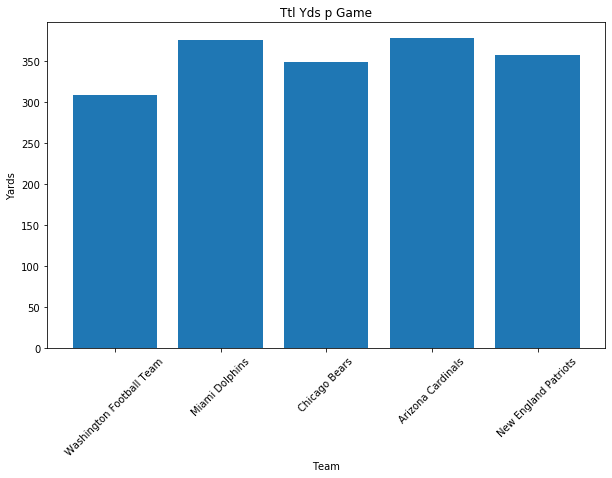

In [190]:
average, def1, _1def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Ttl Yds p Game", "Team", "Yards")

Avg Ttl_Turnovers_pG: 1.2
Washington Football Team Ttl_Turnovers_pG: 1.29
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.2
Miami Dolphins Ttl_Turnovers_pG: 1.86
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.2
Chicago Bears Ttl_Turnovers_pG: 1.12
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.2
Arizona Cardinals Ttl_Turnovers_pG: 1.43
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.2
New England Patriots Ttl_Turnovers_pG: 1.86
--------------------------------------------------


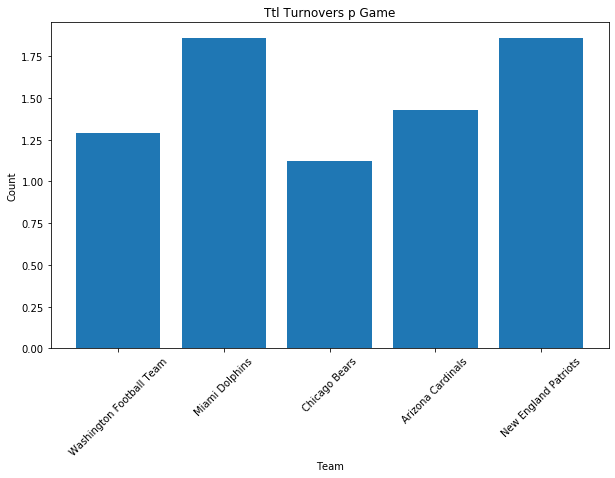

In [191]:
average, def1, _1def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Ttl Turnovers p Game", "Team", "Count")

Avg Sacks_pG: 1.96
Washington Football Team Sacks_pG: 3.14
--------------------------------------------------
Avg Sacks_pG: 1.96
Miami Dolphins Sacks_pG: 2.71
--------------------------------------------------
Avg Sacks_pG: 1.96
Chicago Bears Sacks_pG: 2.12
--------------------------------------------------
Avg Sacks_pG: 1.96
Arizona Cardinals Sacks_pG: 2.71
--------------------------------------------------
Avg Sacks_pG: 1.96
New England Patriots Sacks_pG: 1.43
--------------------------------------------------


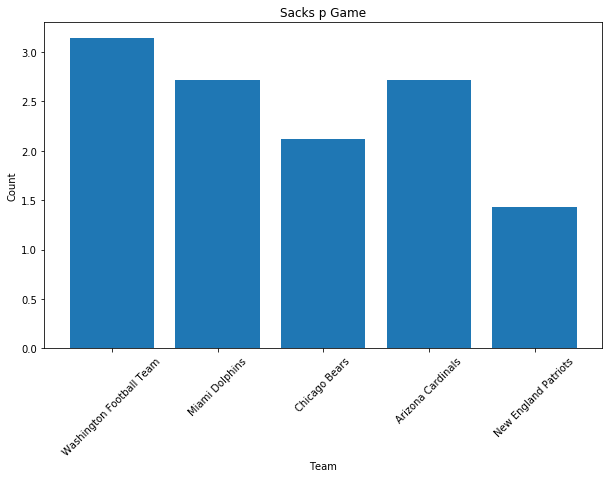

In [192]:
average, def1, _1def = print_metric_team(available_def, 'Sacks_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Sacks_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Sacks_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Sacks_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Sacks_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Sacks p Game", "Team", "Count")

In [193]:
available_off.columns

Index(['Team', 'Long_Name', 'GP', 'CompletedPasses', 'PassesAttempted',
       'PassingYds', 'PassingTDs', 'Interceptions', 'RushingAttempts',
       'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds',
       'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts',
       'Ttl_Turnovers', 'CompletedPasses_pG', 'PassesAttempted_pG',
       'Completion_Percent', 'PassingYds_pG', 'PassYds_pAtt',
       'RushingAttempts_pG', 'RushingYds_pG', 'RushYds_pAtt', 'Ttl_Yds',
       'Ttl_Turnovers_pG', 'TtlTDs_pG'],
      dtype='object')

Avg Ttl_Yds: 372.66
NYG Ttl_Yds: 309.0
--------------------------------------------------
Avg Ttl_Yds: 372.66
ARI Ttl_Yds: 424.57
--------------------------------------------------
Avg Ttl_Yds: 372.66
TEN Ttl_Yds: 416.0
--------------------------------------------------
Avg Ttl_Yds: 372.66
MIA Ttl_Yds: 331.71
--------------------------------------------------
Avg Ttl_Yds: 372.66
NYJ Ttl_Yds: 267.0
--------------------------------------------------


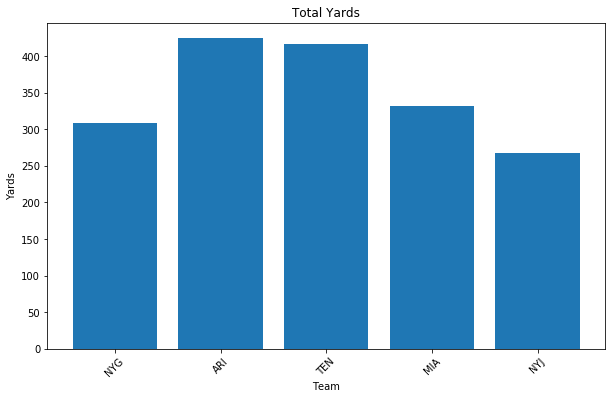

In [194]:
average, off1, _1off = print_metric_team(available_off, 'Ttl_Yds', off_team1)
average, off2, _2off = print_metric_team(available_off, 'Ttl_Yds', off_team2)
average, off3, _3off = print_metric_team(available_off, 'Ttl_Yds', off_team3)
average, off4, _4off = print_metric_team(available_off, 'Ttl_Yds', off_team4)
average, off5, _5off = print_metric_team(available_off, 'Ttl_Yds', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total Yards", "Team", "Yards")

Avg Ttl_Turnovers_pG: 1.33
NYG Ttl_Turnovers_pG: 1.88
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.33
ARI Ttl_Turnovers_pG: 1.29
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.33
TEN Ttl_Turnovers_pG: 0.57
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.33
MIA Ttl_Turnovers_pG: 1.29
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.33
NYJ Ttl_Turnovers_pG: 1.12
--------------------------------------------------


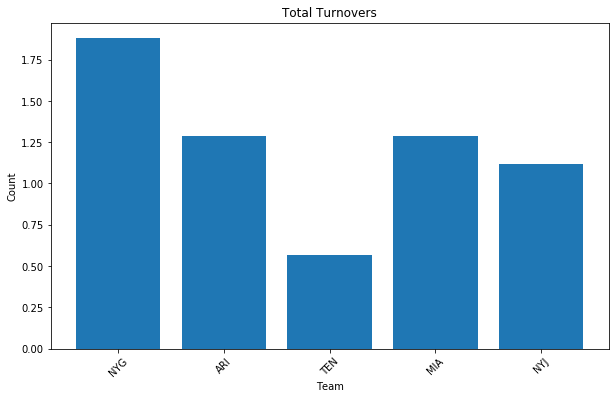

In [197]:
average, off1, _1off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team1)
average, off2, _2off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team2)
average, off3, _3off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team3)
average, off4, _4off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team4)
average, off5, _5off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total Turnovers", "Team", "Count")

Avg TtlTDs_pG: 2.72
NYG TtlTDs_pG: 1.5
--------------------------------------------------
Avg TtlTDs_pG: 2.72
ARI TtlTDs_pG: 3.57
--------------------------------------------------
Avg TtlTDs_pG: 2.72
TEN TtlTDs_pG: 3.71
--------------------------------------------------
Avg TtlTDs_pG: 2.72
MIA TtlTDs_pG: 2.71
--------------------------------------------------
Avg TtlTDs_pG: 2.72
NYJ TtlTDs_pG: 0.88
--------------------------------------------------


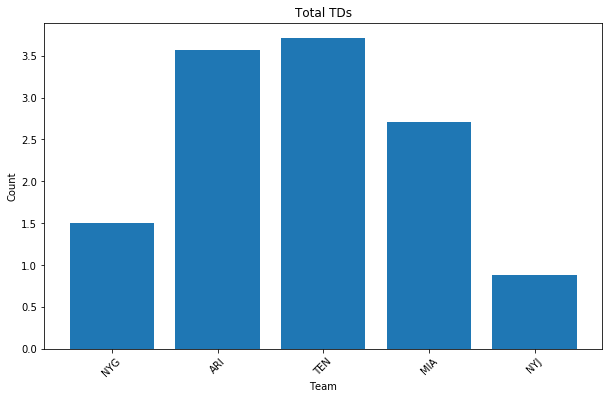

In [199]:
average, off1, _1off = print_metric_team(available_off, 'TtlTDs_pG', off_team1)
average, off2, _2off = print_metric_team(available_off, 'TtlTDs_pG', off_team2)
average, off3, _3off = print_metric_team(available_off, 'TtlTDs_pG', off_team3)
average, off4, _4off = print_metric_team(available_off, 'TtlTDs_pG', off_team4)
average, off5, _5off = print_metric_team(available_off, 'TtlTDs_pG', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total TDs", "Team", "Count")

This is an interesting one. The Giants by far turn the ball over more than any other team, but the Jets don't score like any points. Washington is going up against the Giants who yes turn the ball over, but Washington has already lost to them this season. I want to take the Patriots, but the fact of the matter is, the Jets may not be scoring TDs, but they're also not turning the football over. Arizona might actually be my best option where they'll play Miami and a rookie QB only in his second game. Tua had a good first game in the sense that he didn't turn the ball over, but he also didn't do much and rested on the defense. 

## Kicking

In [200]:
available_kickers = kicking_df[~kicking_df['PLAYER'].isin(taken_k)]
available_kickers.head()

,PLAYER,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8
0,Randy Bullock,K,CIN,8,20,90.00,55,0-0,3-3,7-8,6-7,2-2,20,100.00,74,84.00,10.00,13.00,12.00,17.00,3.00,12.00,10.00,7.00
1,Younghoe Koo,K,ATL,7,20,95.00,54,0-0,5-5,5-5,7-8,2-2,17,82.40,71,82.00,9.00,17.00,8.00,0.00,13.00,20.00,2.00,13.00
2,Ryan Succop,K,TB,8,17,88.20,50,0-0,3-3,7-7,4-5,1-2,27,96.30,71,77.00,5.00,7.00,9.00,8.00,14.00,10.00,9.00,15.00
5,Daniel Carlson,K,LV,7,18,88.90,54,0-0,7-7,4-4,2-4,3-3,20,95.00,67,75.00,12.00,12.00,8.00,13.00,11.00,0.00,9.00,10.00
9,Jason Sanders,K,MIA,7,15,100.00,52,0-0,5-5,2-2,6-6,2-2,17,100.00,62,72.00,4.00,11.00,7.00,18.00,22.00,6.00,0.00,4.00


In [201]:
available_kickers.rename(columns={'PLAYER': 'Player'}, inplace=True)

In [202]:
available_kickers['FG_1_19'] = available_kickers['_1_19'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_20_29'] = available_kickers['_20_29'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_30_39'] = available_kickers['_30_39'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_40_49'] = available_kickers['_40_49'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_OVER50'] = available_kickers['OVER50'].map(lambda x: int(x.split('-')[0]))

In [203]:
available_kickers.sort_values('OVER50', ascending = False).head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50
22,Stephen Gostkowski,K,TEN,7,17,58.80,55,0-0,1-2,3-4,1-5,5-6,22,90.90,50,61.00,4.00,12.00,25.00,0.00,6.00,4.00,8.00,2.00,0,1,3,1,5
13,Brandon McManus,K,DEN,7,15,93.30,56,0-0,3-3,1-1,5-5,5-6,14,92.90,55,70.00,2.00,8.00,6.00,18.00,0.00,24.00,5.00,7.00,0,3,1,5,5
11,Graham Gano,K,NYG,8,17,94.10,55,0-0,4-4,6-6,2-2,4-5,11,100.00,59,69.00,4.00,7.00,13.00,9.00,20.00,8.00,3.00,5.00,0,4,6,2,4
5,Daniel Carlson,K,LV,7,18,88.90,54,0-0,7-7,4-4,2-4,3-3,20,95.00,67,75.00,12.00,12.00,8.00,13.00,11.00,0.00,9.00,10.00,0,7,4,2,3
14,Matt Prater,K,DET,7,17,70.60,51,0-0,2-2,5-5,3-5,2-5,19,100.00,55,62.00,12.00,3.00,14.00,3.00,0.00,11.00,16.00,3.00,0,2,5,3,2


In [204]:
available_kickers.columns

Index(['Player', 'POSITION', 'TEAM', 'GP', 'FGM_A', 'FG%', 'LNG', '_1_19',
       '_20_29', '_30_39', '_40_49', 'OVER50', 'XPM_A', 'XP%', 'PTS', 'TTL',
       'Week_1', 'Week_2', 'Week_3', 'Week_4', 'Week_5', 'Week_6', 'Week_7',
       'Week_8', 'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50'],
      dtype='object')

In [205]:
scaled_k = available_kickers[['Player', 'POSITION', 'TEAM', 'GP', 'FGM_A', 'FG%', 'LNG', 'XPM_A', 'XP%', 'PTS',
                              'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50']]

k_columns = ['FGM_A', 'FG%', 'LNG', 'XPM_A', 'XP%', 'PTS', 'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50']

scale_data(scaled_k, k_columns)

scaled_k.head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,XPM_A,XP%,PTS,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50
0,Randy Bullock,K,CIN,8,1.53,0.50,0.66,0.63,0.50,1.46,-0.18,0.62,1.86,1.62,0.52
1,Younghoe Koo,K,ATL,7,1.53,0.68,0.60,0.30,-0.38,1.33,-0.18,1.82,0.95,2.10,0.52
2,Ryan Succop,K,TB,8,1.05,0.44,0.35,1.41,0.31,1.33,-0.18,0.62,1.86,0.66,-0.20
5,Daniel Carlson,K,LV,7,1.21,0.46,0.60,0.63,0.25,1.16,-0.18,3.02,0.49,-0.30,1.25
9,Jason Sanders,K,MIA,7,0.72,0.86,0.47,0.30,0.50,0.94,-0.18,1.82,-0.43,1.62,0.52


In [207]:
scaled_k['Combined_Score'] = (scaled_k['FGM_A'] + scaled_k['FG%'] + scaled_k['LNG'] + 
                              scaled_k['XPM_A'] + scaled_k['XP%'] + scaled_k['PTS'] + 
                              scaled_k['FG_1_19'] + scaled_k['FG_20_29'] + scaled_k['FG_30_39'] + 
                              scaled_k['FG_40_49'] + scaled_k['FG_OVER50'])

scaled_k.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_k.head(10)

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,XPM_A,XP%,PTS,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50,Combined_Score
10,Tyler Bass,K,BUF,8,1.21,-0.14,0.54,0.86,0.27,0.86,5.57,0.62,0.03,1.14,-0.20,10.74
0,Randy Bullock,K,CIN,8,1.53,0.50,0.66,0.63,0.50,1.46,-0.18,0.62,1.86,1.62,0.52,9.72
1,Younghoe Koo,K,ATL,7,1.53,0.68,0.60,0.30,-0.38,1.33,-0.18,1.82,0.95,2.10,0.52,9.26
5,Daniel Carlson,K,LV,7,1.21,0.46,0.60,0.63,0.25,1.16,-0.18,3.02,0.49,-0.30,1.25,8.58
2,Ryan Succop,K,TB,8,1.05,0.44,0.35,1.41,0.31,1.33,-0.18,0.62,1.86,0.66,-0.20,7.65
11,Graham Gano,K,NYG,8,1.05,0.65,0.66,-0.36,0.50,0.82,-0.18,1.22,1.41,-0.30,1.98,7.42
9,Jason Sanders,K,MIA,7,0.72,0.86,0.47,0.30,0.50,0.94,-0.18,1.82,-0.43,1.62,0.52,7.15
13,Brandon McManus,K,DEN,7,0.72,0.62,0.72,-0.03,0.14,0.64,-0.18,0.62,-0.89,1.14,2.71,6.21
12,Cairo Santos,K,CHI,8,0.88,0.41,0.66,0.08,0.50,0.73,-0.18,0.62,1.41,0.18,0.52,5.81
14,Matt Prater,K,DET,7,1.05,-0.19,0.41,0.52,0.50,0.64,-0.18,0.02,0.95,0.18,0.52,4.42


In [210]:
kicker1 = 10
kicker2 = 1
kicker3 = 5
kicker4 = 2
kicker5 = 13

Avg FGM_A: 10.53
Tyler Bass FGM_A: 18
--------------------------------------------------
Avg FGM_A: 10.53
Younghoe Koo FGM_A: 20
--------------------------------------------------
Avg FGM_A: 10.53
Daniel Carlson FGM_A: 18
--------------------------------------------------
Avg FGM_A: 10.53
Ryan Succop FGM_A: 17
--------------------------------------------------
Avg FGM_A: 10.53
Brandon McManus FGM_A: 15
--------------------------------------------------


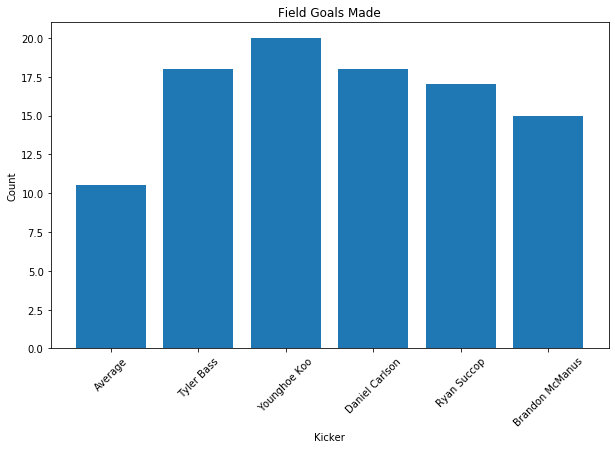

In [211]:
average, kick1, _1kick = print_metric(available_kickers, 'FGM_A', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'FGM_A', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'FGM_A', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'FGM_A', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'FGM_A', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Field Goals Made', 'Kicker', 'Count')

Avg FG%: 76.0
Tyler Bass FG%: 72.2
--------------------------------------------------
Avg FG%: 76.0
Younghoe Koo FG%: 95.0
--------------------------------------------------
Avg FG%: 76.0
Daniel Carlson FG%: 88.9
--------------------------------------------------
Avg FG%: 76.0
Ryan Succop FG%: 88.2
--------------------------------------------------
Avg FG%: 76.0
Brandon McManus FG%: 93.3
--------------------------------------------------


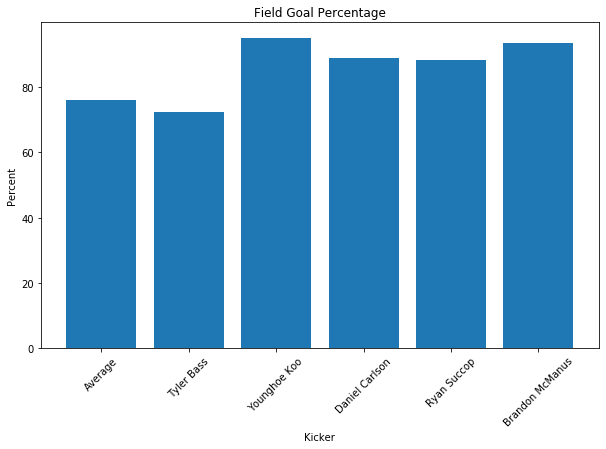

In [212]:
average, kick1, _1kick = print_metric(available_kickers, 'FG%', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'FG%', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'FG%', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'FG%', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'FG%', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Field Goal Percentage', 'Kicker', 'Percent')

Avg XPM_A: 14.28
Tyler Bass XPM_A: 22
--------------------------------------------------
Avg XPM_A: 14.28
Younghoe Koo XPM_A: 17
--------------------------------------------------
Avg XPM_A: 14.28
Daniel Carlson XPM_A: 20
--------------------------------------------------
Avg XPM_A: 14.28
Ryan Succop XPM_A: 27
--------------------------------------------------
Avg XPM_A: 14.28
Brandon McManus XPM_A: 14
--------------------------------------------------


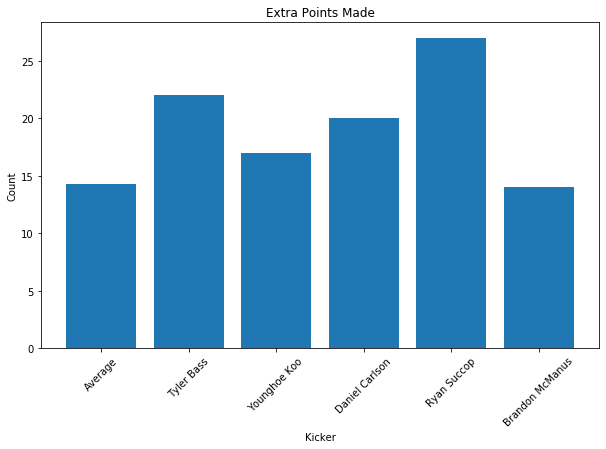

In [213]:
average, kick1, _1kick = print_metric(available_kickers, 'XPM_A', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'XPM_A', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'XPM_A', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'XPM_A', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'XPM_A', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Extra Points Made', 'Kicker', 'Count')

Avg XP%: 89.99
Tyler Bass XP%: 95.5
--------------------------------------------------
Avg XP%: 89.99
Younghoe Koo XP%: 82.4
--------------------------------------------------
Avg XP%: 89.99
Daniel Carlson XP%: 95.0
--------------------------------------------------
Avg XP%: 89.99
Ryan Succop XP%: 96.3
--------------------------------------------------
Avg XP%: 89.99
Brandon McManus XP%: 92.9
--------------------------------------------------


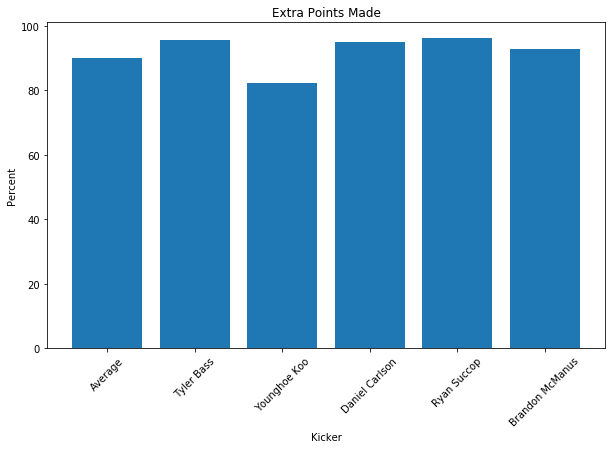

In [214]:
average, kick1, _1kick = print_metric(available_kickers, 'XP%', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'XP%', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'XP%', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'XP%', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'XP%', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Extra Points Made', 'Kicker', 'Percent')

In [215]:
kicking_opponents = ['Seattle Seahawks', 'Denver Broncos', 'Los Angeles Chargers', 'New Orleans Saints', 
                     'Atlanta Falcons']

In [219]:
kicking_defense = defense[defense['Team'].isin(kicking_opponents)]
kicking_defense['Ttl_TDs'] = kicking_defense['Rushing_TDs']+kicking_defense['Passing_TDs']
kicking_defense['Points_from_Kicking'] = kicking_defense['Ttl_Pts_Allowed']-(kicking_defense['Ttl_TDs']*7)
kicking_defense['Num_Field_Goals_Allowed'] = kicking_defense['Points_from_Kicking']/3
kicking_defense

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Sacks_pG,TTL_pG,Ttl_Turnovers_pG,Ttl_TDs,Points_from_Kicking,Num_Field_Goals_Allowed
12,Denver Broncos,7,183,472,5.30,2520,190,864,4.50,5,262,5.90,173,10.30,1656,11,25,12,48.00,8,5,3,20,35.00,2.00,5.00,1.00,6.00,0.00,14.00,2.00,5.00,26.14,360.00,27.14,123.43,37.43,24.71,0.66,236.57,1.57,2.86,5.00,1.14,16,71,23.67
14,Los Angeles Chargers,7,185,454,5.60,2548,166,786,4.70,5,273,6.10,175,10.50,1762,14,22,12,54.50,6,4,2,15,32.00,11.00,1.00,2.00,4.00,3.00,0.00,8.00,3.00,26.43,364.00,23.71,112.29,39.00,25.00,0.64,251.71,2.00,2.14,4.57,0.86,19,52,17.33
17,New Orleans Saints,7,197,437,5.30,2299,178,634,3.60,5,240,6.40,160,11.30,1665,19,24,20,83.30,6,4,2,19,31.00,15.00,4.00,-3.00,4.00,3.00,0.00,1.00,7.00,28.14,328.43,25.43,90.57,34.29,22.86,0.67,237.86,2.71,2.71,4.43,0.86,24,29,9.67
19,Seattle Seahawks,7,199,525,6.10,3226,185,715,3.90,9,328,7.40,223,11.50,2511,13,26,18,69.20,14,9,5,12,37.00,6.00,3.00,9.00,5.00,7.00,0.00,0.00,7.00,28.43,460.86,26.43,102.14,46.86,31.86,0.68,358.71,1.86,1.71,5.29,2.00,22,45,15.00
28,Atlanta Falcons,8,224,501,6.60,3285,185,794,4.30,7,303,7.90,213,12.20,2491,20,27,20,74.10,9,6,3,13,22.00,-1.00,3.00,5.00,0.00,0.00,7.00,2.00,6.00,28.00,410.62,23.12,99.25,37.88,26.62,0.70,311.38,2.50,1.62,2.75,1.12,27,35,11.67


In [220]:
kick_def1 = 19
kick_def2 = 12
kick_def3 = 14
kick_def4 = 17
kick_def5 = 28

Avg RZ_Percent: 65.82
Seattle Seahawks RZ_Percent: 69.2
--------------------------------------------------
Avg RZ_Percent: 65.82
Denver Broncos RZ_Percent: 48.0
--------------------------------------------------
Avg RZ_Percent: 65.82
Los Angeles Chargers RZ_Percent: 54.5
--------------------------------------------------
Avg RZ_Percent: 65.82
New Orleans Saints RZ_Percent: 83.3
--------------------------------------------------
Avg RZ_Percent: 65.82
Atlanta Falcons RZ_Percent: 74.1
--------------------------------------------------


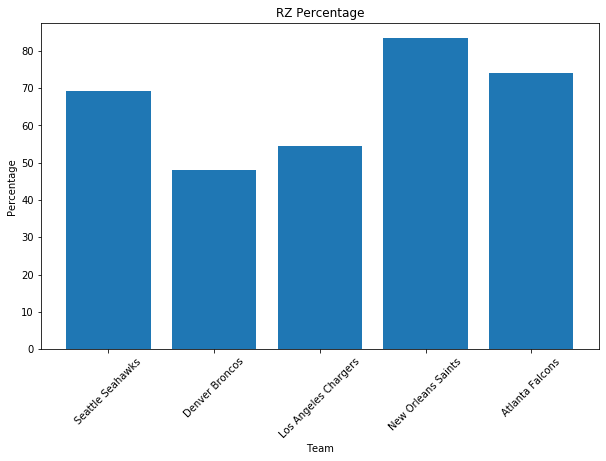

In [222]:
average, kdef1, _1kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'RZ Percentage', 'Team', 'Percentage')

Avg Num_Field_Goals_Allowed: 15.47
Seattle Seahawks Num_Field_Goals_Allowed: 15.0
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 15.47
Denver Broncos Num_Field_Goals_Allowed: 23.67
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 15.47
Los Angeles Chargers Num_Field_Goals_Allowed: 17.33
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 15.47
New Orleans Saints Num_Field_Goals_Allowed: 9.67
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 15.47
Atlanta Falcons Num_Field_Goals_Allowed: 11.67
--------------------------------------------------


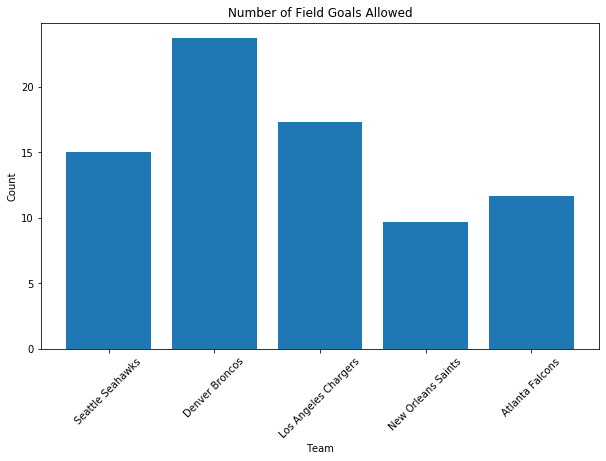

In [224]:
average, kdef1, _1kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'Number of Field Goals Allowed', 'Team', 'Count')

Avg Ttl_TDs: 21.6
Seattle Seahawks Ttl_TDs: 22
--------------------------------------------------
Avg Ttl_TDs: 21.6
Denver Broncos Ttl_TDs: 16
--------------------------------------------------
Avg Ttl_TDs: 21.6
Los Angeles Chargers Ttl_TDs: 19
--------------------------------------------------
Avg Ttl_TDs: 21.6
New Orleans Saints Ttl_TDs: 24
--------------------------------------------------
Avg Ttl_TDs: 21.6
Atlanta Falcons Ttl_TDs: 27
--------------------------------------------------


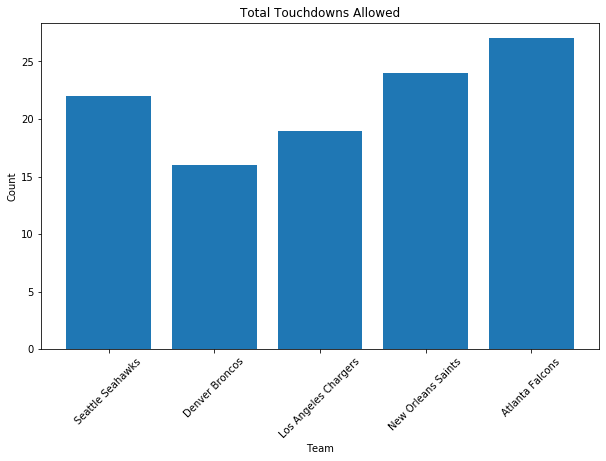

In [225]:
average, kdef1, _1kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'Total Touchdowns Allowed', 'Team', 'Count')

I want to go with Younghoe Koo. He has the worst XP%, but he's going up against the Broncos who've allowed the fewest number of touchdowns while giving up roughly the most field goals where Koo has the highest percentage made.